# Title - EDA Questions

## How does series runtime vary over time for tv and movies?

## Is there a Relationship between Studio,Genre and Rating.

# Setup

## Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

sns.set_palette("Set2")
sns.set_style("whitegrid")

## Functions

In [3]:
def univariate_numerical_analysis(numerical_frame: pd.DataFrame ,column:str, new_index:str):
    
    numerical_data = numerical_frame.loc[:,column]

    mean_val = round(numerical_data.mean(),2)
    median_val = round(numerical_data.median(),2)
    std_val = round(numerical_data.std(),2)
    range_val = round(numerical_data.max() - numerical_data.min(),2)  
    iqr_val = round(numerical_data.quantile(0.75)-numerical_data.quantile(0.25),2)
    skew_val = round(numerical_data.skew(),2)
    kurtosis_val = round(numerical_data.kurtosis(),2)
    coefficient_of_variance_val = round(((std_val / mean_val) if mean_val != 0 else 0),2) 
    mode_val = numerical_data.mode().tolist()    
    mode_val_string = ""

    for _ in mode_val:
        mode_val_string += str(format(_, ".2f")) + ","



    output_frame = pd.DataFrame(
        {"Mean": [mean_val],
         "Median": [median_val],
         "Mode": [mode_val],
         "Standard Deviation": [std_val],
         "Range": [range_val],
         "Inter-Quartile Range": [iqr_val],
         "Skewness": [skew_val],
         "Kurtosis": [kurtosis_val],
         "Coefficient of Variance": [coefficient_of_variance_val]})
    output_frame.index = [new_index]
   
    return(output_frame)

In [4]:
def iqr_outlier_strip(numerical_frame: pd.DataFrame,column:str):
    
    q1 = np.percentile(numerical_frame[column], 25)
    q3 = np.percentile(numerical_frame[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = (numerical_frame[column] < lower_bound) | (numerical_frame[column] > upper_bound)

    numerical_frame_filtered = numerical_frame[~outlier_mask]

    return(numerical_frame_filtered)

## Loading Data

In [5]:
df = pd.read_csv("Top_Anime_data.csv")

df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]   ### Anti-whitespace pro snake_case

## Data Inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   score        1000 non-null   float64
 1   popularity   1000 non-null   int64  
 2   rank         1000 non-null   int64  
 3   members      1000 non-null   int64  
 4   description  1000 non-null   object 
 5   synonyms     709 non-null    object 
 6   japanese     999 non-null    object 
 7   english      859 non-null    object 
 8   type         1000 non-null   object 
 9   episodes     1000 non-null   object 
 10  status       1000 non-null   object 
 11  aired        1000 non-null   object 
 12  premiered    569 non-null    object 
 13  broadcast    569 non-null    object 
 14  producers    1000 non-null   object 
 15  licensors    1000 non-null   object 
 16  studios      1000 non-null   object 
 17  source       1000 non-null   object 
 18  genres       771 non-null    object 
 19  demogra

filtering df by data type so data inspectionis easier

In [7]:
cat = df.select_dtypes(exclude="number")
cat_columns = list(cat.columns)
print(f"The categorical columns of the cat dataframe are :{cat_columns}")

The categorical columns of the cat dataframe are :['description', 'synonyms', 'japanese', 'english', 'type', 'episodes', 'status', 'aired', 'premiered', 'broadcast', 'producers', 'licensors', 'studios', 'source', 'genres', 'demographic', 'duration', 'rating']


In [8]:
num = df.select_dtypes(include="number")
num_columns = list(num.columns)
print(f"The numerical columns of num dataframe are :{num_columns}")
num.info()

The numerical columns of num dataframe are :['score', 'popularity', 'rank', 'members']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   score       1000 non-null   float64
 1   popularity  1000 non-null   int64  
 2   rank        1000 non-null   int64  
 3   members     1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


### Numeric data check 1

In [9]:
num_non_null_columns =num.notnull().sum()
num_non_null_total = num.notnull().sum().sum()
num_non_null_percentage_column = num.notnull().sum() / len(num)
num_non_null_percentage_total = (num.notnull().sum().sum()) / (num.size)
                                                                            # Count of non-missing values per column:

num_dup = num.duplicated()
num_dup_total = num.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
num_na_columns = num.isna().sum()             
num_na_total = num.isna().sum().sum()

print(f"""
number of non-null values in the frame of numeric data: {num_non_null_total},
number of non-null values by column: \n\n{num_non_null_columns}\n

precentage of non-null values in the frame of numeric data: {num_non_null_percentage_total * 100},
precentage of non-null values by column: \n\n{num_non_null_percentage_column * 100}
      
number of duplicates in the frame of numeric data: {num_dup_total},

number of null values in the frame of numeric data:{num_na_total},
number of null values by column:\n\n{num_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(num[num_dup].index )}") # num_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(num_na_columns[num_na_columns > 0].index)}")



number of non-null values in the frame of numeric data: 4000,
number of non-null values by column: 

score         1000
popularity    1000
rank          1000
members       1000
dtype: int64


precentage of non-null values in the frame of numeric data: 100.0,
precentage of non-null values by column: 

score         100.0
popularity    100.0
rank          100.0
members       100.0
dtype: float64

number of duplicates in the frame of numeric data: 0,

number of null values in the frame of numeric data:0,
number of null values by column:

score         0
popularity    0
rank          0
members       0
dtype: int64

The following rows are duplicates: 
The following columns have null values: 


### Categoric data check 1

In [10]:
##.strip() on cat

stripped = lambda _: _.strip() if isinstance(_, str) else _
cat = cat.map(stripped)

##

cat_non_null_columns = cat.notnull().sum()
cat_non_null_total = cat.notnull().sum().sum()
cat_non_null_percentage_column = cat.notnull().sum() / len(cat)
cat_non_null_percentage_total = (cat.notnull().sum().sum()) / (cat.size)
                                                                            # Count of non-missing values per column:

cat_dup = cat.duplicated()
cat_dup_total = cat.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
cat_na_columns = cat.isna().sum()             
cat_na_total = cat.isna().sum().sum()

#cat_spaced_values_total_old = cat.eq(" ").sum().sum()                      # Old basic whitespace detector

cat_spaced_values_columns = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum() 
cat_spaced_values_total = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum().sum() 

# Treats every column as data type string, and for every column applies the check that it is not continuos whitespace using the regex
# expression r'^\s*$' and the str.match() method. ^ indicates the start, \s*checks for coninuos whitespace, and $indicates the end of the expression. 

print(f"""
number of non-null values in the frame of categoric data: {cat_non_null_total},
number of non-null values by column: \n\n{cat_non_null_columns}

percentage of non-null values in the frame of categoric data: {cat_non_null_percentage_total * 100},
percentage of non-null values by column: \n\n{cat_non_null_percentage_column * 100}

number of duplicates in the frame of categoric data: {cat_dup_total},

number of white space values in the frame of categoric data: {cat_spaced_values_total},
number of white space values by column: \n\n{cat_spaced_values_columns}

number of null values in the frame of categoric data:{cat_na_total},
number of null values by column:\n\n{cat_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(cat[cat_dup].index )}") # cat_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(cat_na_columns[cat_na_columns > 0].index)}")



number of non-null values in the frame of categoric data: 15997,
number of non-null values by column: 

description    1000
synonyms        709
japanese        999
english         859
type           1000
episodes       1000
status         1000
aired          1000
premiered       569
broadcast       569
producers      1000
licensors      1000
studios        1000
source         1000
genres          771
demographic     521
duration       1000
rating         1000
dtype: int64

percentage of non-null values in the frame of categoric data: 88.87222222222222,
percentage of non-null values by column: 

description    100.0
synonyms        70.9
japanese        99.9
english         85.9
type           100.0
episodes       100.0
status         100.0
aired          100.0
premiered       56.9
broadcast       56.9
producers      100.0
licensors      100.0
studios        100.0
source         100.0
genres          77.1
demographic     52.1
duration       100.0
rating         100.0
dtype: float64

num

## Data Formatting

### Making episodes column numeric

All null values set to zero, the zeros can be dropped later if needed.

In [11]:
df["episodes"] = pd.to_numeric(df["episodes"], errors = "coerce").fillna(0).astype(int)             #null values saved as zero


### Air dates and time on air

In [12]:
first_last = df["aired"].astype(str).str.split(" to ", n=1, expand=True)        # first_last is a new dataframe that takes each result from the split as a new column


df["aired_first"] = first_last[0].str.strip()
df["aired_last"] = (
        df["aired_first"].where(df["type"].eq("Movie"),
        first_last[1]
        .str.strip()
        .replace("?", "Dec 31, 2024") if first_last.shape[1] > 1 else pd.NA
    )
)

## .partion() caused so many problems, sometimes fancy speciifc functions are not worth it

# df[["japanese","aired_first","aired_last"]].head(50)                          # Entry 50 one piece is proof this worked

In [13]:
df["aired_first"] = pd.to_datetime(df["aired_first"], format="%b %d, %Y")
df["aired_last"] = pd.to_datetime(df["aired_last"], format="%b %d, %Y")

df["years_on_air"] = (df["aired_last"] - df["aired_first"]).dt.days / 365

# years_on_air needs to filter out zero for distibutions due to how movies has ve been assigned last_aired dates 

In [14]:
df["years_on_air"][df["type"] == "Movie"].isna().value_counts()         #testing movies have same first last aired values ather than Null

years_on_air
False    235
Name: count, dtype: int64

### Studios

In [15]:
## Maybe its better to store studios in list, because we can still access the studios via index. Keeping studios as a list is the only option
## as the number of unique values of studio is so much larger than genre, and also we are not planning on running correlation testing on studios. 

df["studios"] = (
    df["studios"]
    .str.replace("None found", "")      ## Ugly necessity to kill the the world famous "None found" studio
    .str.replace(" add some", "")       ## Ugly necessity to kill the the world famous "None found"'s sister studio " add some"
    .str.split(",")
    .apply(lambda lst: [_.strip() for _ in lst if _ and _.strip()])    #.strip() on an empty string returns False so wont be added to list.
    )



In [16]:
### example way can be used to find indexes that contain a studio

mask = df["studios"].apply(lambda _: "Studio Ghibli" in _)        
df_ghibli = df[mask]


ghibli_production_count =  df_ghibli.shape[0]
ghibli_production_count

14

In [17]:
# a.union(b) returns a set containing all unique elements of a and b. only a need to be a set
# so we can use an empty set and df[*studios] (* unpacks studios, so each list is acted on not the series),

list_unique_studios = set().union(*df["studios"])
list_unique_studios

## "None found" and "add some" are interesting studios

{'8bit',
 'A-1 Pictures',
 'A.C.G.T.',
 'ABJ COMPANY',
 'AHA Entertainment',
 'AIC',
 'AIC ASTA',
 'APPP',
 'Actas',
 'Ajia-do',
 'Animation Do',
 'Artland',
 'B.CMAY PICTURES',
 'BUG FILMS',
 'Bandai Namco Pictures',
 'Bee Train',
 'Bibury Animation Studios',
 'Bones',
 "Brain's Base",
 'C-Station',
 'C2C',
 'CLAP',
 'Cloud Hearts',
 'CloverWorks',
 'CoMix Wave Films',
 'Colored Pencil Animation',
 'CygamesPictures',
 'DandeLion Animation Studio',
 'David Production',
 'Doga Kobo',
 'Drive',
 'E&G Films',
 'Egg Firm',
 'Encourage Films',
 'Fenz',
 'Flat Studio',
 'Gainax',
 'Gallop',
 'Geek Toys',
 'Geno Studio',
 'GoHands',
 'Gonzo',
 'Graphinica',
 'Group TAC',
 'HAL Film Maker',
 'HMCH',
 'HORNETS',
 'Haoliners Animation League',
 'Hololive Production',
 'Hoods Entertainment',
 'Imagin',
 'J.C.Staff',
 'K-Factory',
 'Khara',
 'Kinema Citrus',
 'Kitty Film Mitaka Studio',
 'Kyoto Animation',
 'LAN Studio',
 'LIDENFILMS',
 'Lapin Track',
 'Lay-duce',
 'Lerche',
 'M.S.C',
 'MAPPA',
 '

### Splitting genres into genres_list

In [18]:
tmp = (                             #tmp as we are only doing this to get a genres list
    df["genres"]
    .astype(str)
    .str.split(",")
    .explode()                      # new rows for each new unique value 
    .str.strip()                    # hidden whitespace destroyer so string slicing doesn't miscount
    .replace({"nan": pd.NA})        # gets rid of nan, the only "genre" that doesn't repeat so isnt affected the same way by the filter
    .dropna())

tmp = sorted(tmp.unique().tolist())

genres_list = []

for _ in tmp:
    genres_list.append(_[0:(len(_)//2)]) # Removes the duplicated words.


### Assigning Genres

In [19]:
def genre_assignment(dataframe):
    for i in genres_list:
        df[i] = df["genres"].str.contains(i)

genre_assignment(df)




### Replacing null English names with Japanese Name.

In [20]:
df["name"] = df["english"].fillna(df["japanese"])

### moving name to the front of the dataframe

df = df[["name"] + [c for c in df.columns if c != "name"]]

df[~df["name"].isnull()] # there is one entry that just wont be removed with .dropna()


,name,score,popularity,rank,members,description,synonyms,japanese,english,type,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,Frieren: Beyond Journey's End,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,...,False,False,False,False,False,False,False,False,False,False
1,Fullmetal Alchemist: Brotherhood,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,...,False,False,False,False,False,False,False,False,False,False
2,Steins;Gate,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,...,False,False,False,False,False,True,False,False,False,True
3,Gintama Season 4,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,...,False,False,False,False,False,True,False,False,False,False
4,Attack on Titan Season 3 Part 2,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Macross Frontier: The False Songstress,7.80,4003,996,31,Half retelling of the original Frontier series...,"Macross Frontier the Movie, Gekijouban Macross...",劇場版 マクロスＦ 虚空歌姫 ～イツワリノウタヒメ～,Macross Frontier: The False Songstress,Movie,...,False,False,False,False,True,True,False,False,False,False
996,マギ シンドバッドの冒険,7.80,1658,997,136,"Not so long ago, mysterious structures called ...",Magi: Adventure of Sinbad OVA,マギ シンドバッドの冒険,NaN,OVA,...,False,False,False,False,False,False,False,False,False,False
997,Detective Conan Movie 09: Strategy Above the D...,7.80,3114,998,50,Fifteen years ago in a barren stretch of the P...,NaN,名探偵コナン 水平線上の陰謀,Detective Conan Movie 09: Strategy Above the D...,Movie,...,False,False,False,True,False,False,False,False,False,False
998,Detective Conan Movie 12: Full Score of Fear,7.80,3194,999,47,Serial murders involving all kinds have happen...,Meitantei Conan: Senritsu no Gakufu [Full Score],名探偵コナン 戦慄の楽譜（フルスコア）,Detective Conan Movie 12: Full Score of Fear,Movie,...,False,False,False,True,False,False,False,False,False,False


### Epsiodes & Runtime (total runtime)

In [21]:
def runtime(string):

    "Not pretty but does what it needs to, more robust version would require regex, and is less dangerous than eval()"

    string = string.replace(" per ep.","")
    string = string.split()

    num_list = []

    for _ in string:
        if "hr."in _ or "min." in _:
            if "hr." in _:                
                num_list.append(int(_.replace("hr.","60")))
            if "min." in _: 
                num_list.append(int(_.replace("min.","1")))
        else:
            num_list.append(int(_))

    term_1 = np.prod(num_list[0:2]) if len(num_list) >= 2 else 0            #all of this bcause np.prod([]) == 1, leading to total runtime off by a hould episode length
    term_2 = np.prod(num_list[2:4]) if len(num_list) >= 4 else 0

    total_minutes = term_1 + term_2

    return(total_minutes)

runtime("24 min. per ep.")
runtime("1 hr. 17 min.")

np.int64(77)

In [22]:
df["episode_runtime_minutes"] = df["duration"].apply(runtime)

df["total_runtime_minutes"] = df["episode_runtime_minutes"] * df["episodes"]
df[["episode_runtime_minutes","episodes","total_runtime_minutes"]]


,episode_runtime_minutes,episodes,total_runtime_minutes
0,24,28,672
1,24,64,1536
2,24,24,576
3,24,51,1224
4,23,10,230
...,...,...,...
995,119,1,119
996,24,5,120
997,110,1,110
998,116,1,116


### Testing if can extract year from first airdate

In [23]:
df["aired_first"].dt.year

0      2023
1      2009
2      2011
3      2015
4      2019
       ... 
995    2009
996    2014
997    2005
998    2008
999    2014
Name: aired_first, Length: 1000, dtype: int32

## Data Inspection Again

In [24]:
# reapplying the snake_case formatting as new columns have been added

df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]   ### Anti-whitespace pro snake_case

In [25]:
cat = df.select_dtypes(exclude="number")

cat = cat.drop(columns="studios")                                       # only doing this because the category test can not handle series that contain lists

cat_columns = list(cat.columns)
print(f"The categorical columns of the cat dataframe are :{cat_columns}")


The categorical columns of the cat dataframe are :['name', 'description', 'synonyms', 'japanese', 'english', 'type', 'status', 'aired', 'premiered', 'broadcast', 'producers', 'licensors', 'source', 'genres', 'demographic', 'duration', 'rating', 'aired_first', 'aired_last', 'action', 'adventure', 'avant_garde', 'award_winning', 'boys_love', 'comedy', 'drama', 'ecchi', 'fantasy', 'girls_love', 'gourmet', 'horror', 'mystery', 'romance', 'sci-fi', 'slice_of_life', 'sports', 'supernatural', 'suspense']


In [26]:
num = df.select_dtypes(include="number")
num_columns = list(num.columns)
print(f"The numerical columns of num dataframe are :{num_columns}")


The numerical columns of num dataframe are :['score', 'popularity', 'rank', 'members', 'episodes', 'years_on_air', 'episode_runtime_minutes', 'total_runtime_minutes']


### Numeric Data Check again

In [27]:
num_non_null_columns =num.notnull().sum()
num_non_null_total = num.notnull().sum().sum()
num_non_null_percentage_column = num.notnull().sum() / len(num)
num_non_null_percentage_total = (num.notnull().sum().sum()) / (num.size)
                                                                            # Count of non-missing values per column:

num_dup = num.duplicated()
num_dup_total = num.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
num_na_columns = num.isna().sum()             
num_na_total = num.isna().sum().sum()

print(f"""
number of non-null values in the frame of numeric data: {num_non_null_total},
number of non-null values by column: \n\n{num_non_null_columns}\n

precentage of non-null values in the frame of numeric data: {num_non_null_percentage_total * 100},
precentage of non-null values by column: \n\n{num_non_null_percentage_column * 100}
      
number of duplicates in the frame of numeric data: {num_dup_total},

number of null values in the frame of numeric data:{num_na_total},
number of null values by column:\n\n{num_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(num[num_dup].index )}") # num_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(num_na_columns[num_na_columns > 0].index)}")



number of non-null values in the frame of numeric data: 7916,
number of non-null values by column: 

score                      1000
popularity                 1000
rank                       1000
members                    1000
episodes                   1000
years_on_air                916
episode_runtime_minutes    1000
total_runtime_minutes      1000
dtype: int64


precentage of non-null values in the frame of numeric data: 98.95,
precentage of non-null values by column: 

score                      100.0
popularity                 100.0
rank                       100.0
members                    100.0
episodes                   100.0
years_on_air                91.6
episode_runtime_minutes    100.0
total_runtime_minutes      100.0
dtype: float64

number of duplicates in the frame of numeric data: 0,

number of null values in the frame of numeric data:84,
number of null values by column:

score                       0
popularity                  0
rank                        0
mem

### Catergoric Data Check again

In [28]:
##.strip() on cat

stripped = lambda _: _.strip() if isinstance(_, str) else _
cat = cat.map(stripped)

##

cat_non_null_columns = cat.notnull().sum()
cat_non_null_total = cat.notnull().sum().sum()
cat_non_null_percentage_column = cat.notnull().sum() / len(cat)
cat_non_null_percentage_total = (cat.notnull().sum().sum()) / (cat.size)
                                                                            # Count of non-missing values per column:

cat_dup = cat.duplicated()
cat_dup_total = cat.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
cat_na_columns = cat.isna().sum()             
cat_na_total = cat.isna().sum().sum()

#cat_spaced_values_total_old = cat.eq(" ").sum().sum()                      # Old basic whitespace detector

cat_spaced_values_columns = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum() 
cat_spaced_values_total = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum().sum() 

# Treats every column as data type string, and for every column applies the check that it is not continuos whitespace using the regex
# expression r'^\s*$' and the str.match() method. ^ indicates the start, \s*checks for coninuos whitespace, and $indicates the end of the expression. 

print(f"""
number of non-null values in the frame of categoric data: {cat_non_null_total},
number of non-null values by column: \n\n{cat_non_null_columns}

percentage of non-null values in the frame of categoric data: {cat_non_null_percentage_total * 100},
percentage of non-null values by column: \n\n{cat_non_null_percentage_column * 100}

number of duplicates in the frame of categoric data: {cat_dup_total},

number of white space values in the frame of categoric data: {cat_spaced_values_total},
number of white space values by column: \n\n{cat_spaced_values_columns}

number of null values in the frame of categoric data:{cat_na_total},
number of null values by column:\n\n{cat_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(cat[cat_dup].index )}") # cat_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(cat_na_columns[cat_na_columns > 0].index)}")



number of non-null values in the frame of categoric data: 31561,
number of non-null values by column: 

name              999
description      1000
synonyms          709
japanese          999
english           859
type             1000
status           1000
aired            1000
premiered         569
broadcast         569
producers        1000
licensors        1000
source           1000
genres            771
demographic       521
duration         1000
rating           1000
aired_first      1000
aired_last        916
action            771
adventure         771
avant_garde       771
award_winning     771
boys_love         771
comedy            771
drama             771
ecchi             771
fantasy           771
girls_love        771
gourmet           771
horror            771
mystery           771
romance           771
sci-fi            771
slice_of_life     771
sports            771
supernatural      771
suspense          771
dtype: int64

percentage of non-null values in the frame of

## Data Cleaning

### Dropping useless columns

In [29]:
columns_to_drop_cat = ["description","synonyms","status","premiered","broadcast","demographic","japanese","english","producers","licensors","genres","aired","rating","genres"]
columns_to_drop_num = ["popularity","members","duration","aired_last","years_on_air"]
columns_to_drop_df = columns_to_drop_cat + columns_to_drop_num

df = df.set_index(df["rank"]) 
df = df.drop(columns = columns_to_drop_df + ["rank"])


- df for runtime work

In [30]:
anime = df.copy()

anime.info()

genres_list = [_.lower().replace(" ", "_") for _ in genres_list] # genres_list needed to be snake_cased aswell
anime_to_drop = genres_list + ["name","studios","score","source"]                 
anime = anime.drop(columns = anime_to_drop)

anime.info()
display(anime)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     999 non-null    object        
 1   score                    1000 non-null   float64       
 2   type                     1000 non-null   object        
 3   episodes                 1000 non-null   int64         
 4   studios                  1000 non-null   object        
 5   source                   1000 non-null   object        
 6   aired_first              1000 non-null   datetime64[ns]
 7   action                   771 non-null    object        
 8   adventure                771 non-null    object        
 9   avant_garde              771 non-null    object        
 10  award_winning            771 non-null    object        
 11  boys_love                771 non-null    object        
 12  comedy                   771 non-null  

,type,episodes,aired_first,episode_runtime_minutes,total_runtime_minutes
rank,,,,,
1,TV,28,2023-09-29,24,672
2,TV,64,2009-04-05,24,1536
3,TV,24,2011-04-06,24,576
4,TV,51,2015-04-08,24,1224
5,TV,10,2019-04-29,23,230
...,...,...,...,...,...
996,Movie,1,2009-11-21,119,119
997,OVA,5,2014-05-14,24,120
998,Movie,1,2005-04-09,110,110


- df for genre work

In [31]:
gsts = df.copy()                                         #gsts is genre studio score

gsts = gsts[~gsts["horror"].isna()]
gsts = gsts.drop(columns = ["name","type","episodes","aired_first","episode_runtime_minutes","total_runtime_minutes"])        
                
gsts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 1 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          771 non-null    float64
 1   studios        771 non-null    object 
 2   source         771 non-null    object 
 3   action         771 non-null    object 
 4   adventure      771 non-null    object 
 5   avant_garde    771 non-null    object 
 6   award_winning  771 non-null    object 
 7   boys_love      771 non-null    object 
 8   comedy         771 non-null    object 
 9   drama          771 non-null    object 
 10  ecchi          771 non-null    object 
 11  fantasy        771 non-null    object 
 12  girls_love     771 non-null    object 
 13  gourmet        771 non-null    object 
 14  horror         771 non-null    object 
 15  mystery        771 non-null    object 
 16  romance        771 non-null    object 
 17  sci-fi         771 non-null    object 
 18  slice_of_life  

### Removing outliers

can be done on-the-fly with the iqr_outlier_strip() function

# Exploration

## Q1) How does series runtime vary over time for tv and movies (seperately)?

How does series runtime vary over time for tv and movies (analyse seperately)

In [32]:
anime_tv_runtime = anime[anime["type"] == "TV"]


# anime_tv_runtime_filtered = iqr_outlier_strip(anime_tv_runtime,"episode_runtime_minutes")         # filering out extreme epidsode lengths by iqr
anime_tv_runtime_filtered = iqr_outlier_strip(anime_tv_runtime,"total_runtime_minutes")             # filtering out extreme runtimes by iqr

### TV

#### Distributions of the frame as a whole

By outliers we mean outliers in terms of the metric "total_runtime_minutes".  

Filtering by episode duration does not affect the overall trend. (test this more)


First let us look at how long an episode usually is:

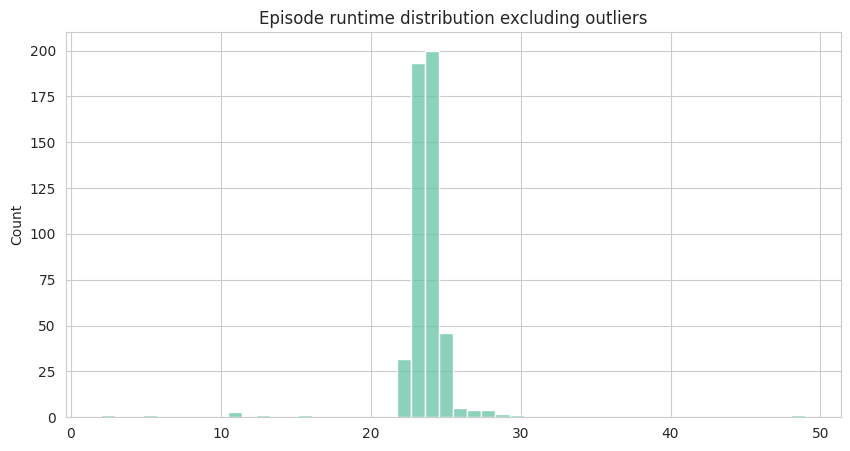

(20.0, 32.0)

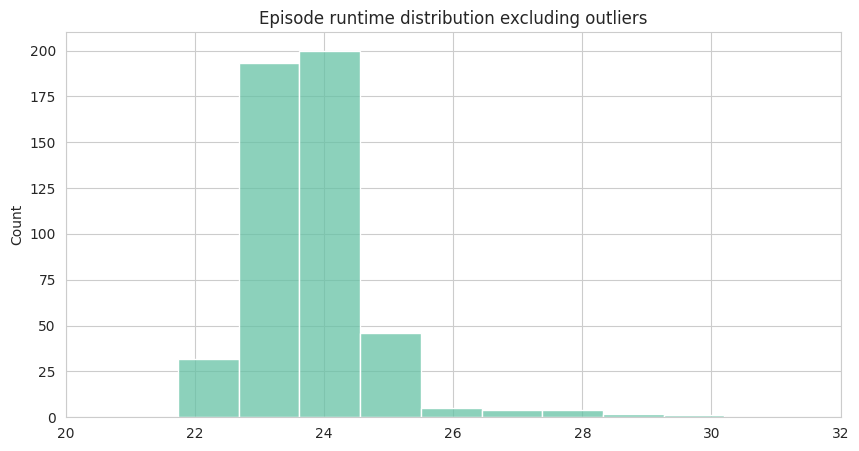

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(anime_tv_runtime_filtered["total_runtime_minutes"] / anime_tv_runtime_filtered["episodes"], bins = 50)
plt.title("Episode runtime distribution excluding outliers")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(anime_tv_runtime_filtered["total_runtime_minutes"] / anime_tv_runtime_filtered["episodes"], bins = 50)
plt.title("Episode runtime distribution excluding outliers")
plt.xlim(20,32)

In [34]:
tmp = (anime_tv_runtime_filtered["total_runtime_minutes"] / anime_tv_runtime_filtered["episodes"]).to_frame()
tmp = tmp.rename(columns = {0:"runtime_per_episode"})

univariate_numerical_analysis(tmp,"runtime_per_episode","runtime_per_episode")


,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
runtime_per_episode,23.53,24.0,[24.0],2.31,47.0,1.0,-1.01,58.52,0.1


The majority of episodes appear to be in the 23-24 minute range.

Now lets have a look at the distibution of epsisode count and after that we will see if total series runtime duration fits with what we observe:

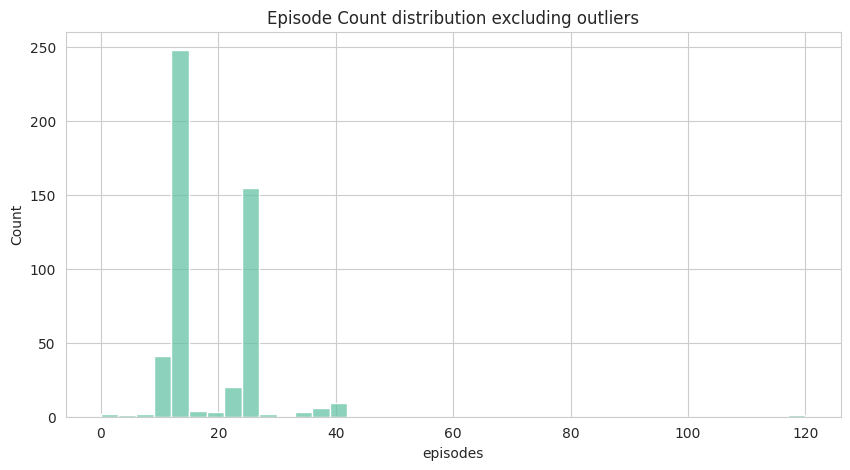

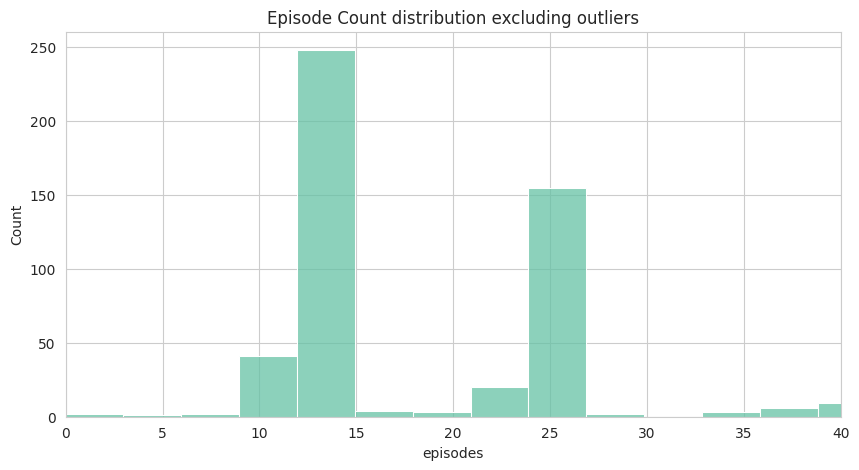

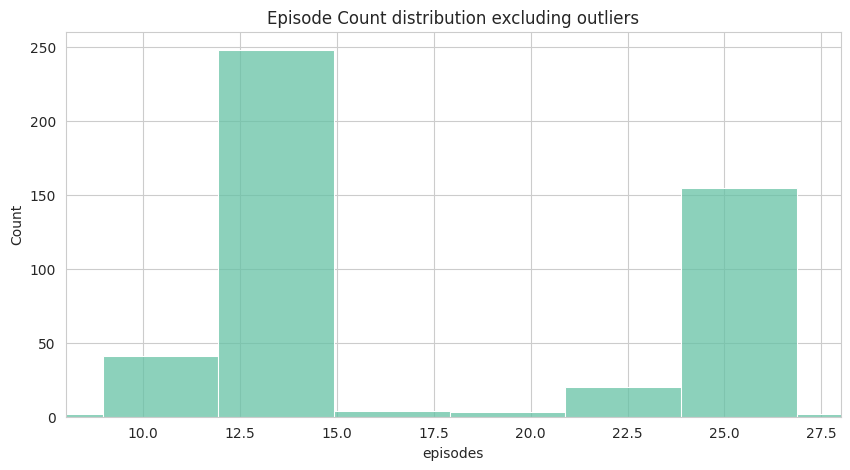

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(anime_tv_runtime_filtered["episodes"])
plt.title("Episode Count distribution excluding outliers")
plt.show()


plt.figure(figsize=(10,5))
sns.histplot(anime_tv_runtime_filtered["episodes"],binrange=(0, 200))
plt.title("Episode Count distribution excluding outliers")
plt.xlim(0,40)
plt.show()


plt.figure(figsize=(10,5))
sns.histplot(anime_tv_runtime_filtered["episodes"], binrange=(0, 200))
plt.title("Episode Count distribution excluding outliers")
plt.xlim(8,28)
plt.show()

In [36]:
univariate_numerical_analysis(anime_tv_runtime_filtered,"episodes","number_of_episodes")

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
number_of_episodes,17.77,13.0,[12],8.6,120,12.0,3.85,39.28,0.48


Two distinct peaks. When looking at runtime duration we expect to see a similar distribution as episode count is narrowly distributed on two peaks and episode length is narrowly focused on  one peak.  

So variance should not play too large a roll in changing the shape of the distibution.

The two disitinct peaks for common episode counts represent shows of episode lengths:

In [37]:
print("median series length when episode total < 20")
display (anime[["episodes","type"]].loc[anime["type"] == "TV"].loc[anime["episodes"] < 20].groupby("type").median())

print("\nmedian series length when episode total between 20 and 30")
display(anime[["episodes","type"]].loc[anime["type"] == "TV"].loc[anime["episodes"].between(20,30)].groupby("type").median())

median series length when episode total < 20


,episodes
type,
TV,12.0



median series length when episode total between 20 and 30


,episodes
type,
TV,25.0


The Distribution of Total Show Runtime

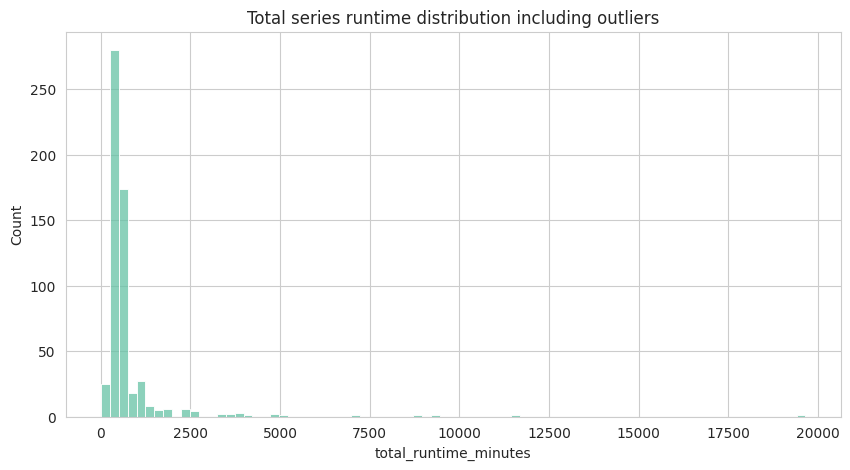

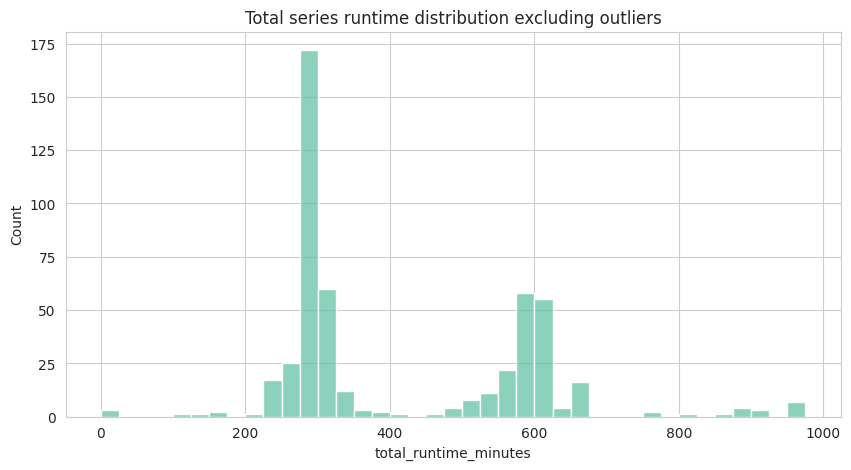

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(anime_tv_runtime["total_runtime_minutes"],binwidth = 250)
plt.title("Total series runtime distribution including outliers")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(anime_tv_runtime_filtered["total_runtime_minutes"],binwidth = 25)
plt.title("Total series runtime distribution excluding outliers")
plt.show()



In [39]:
a = univariate_numerical_analysis(anime_tv_runtime,"total_runtime_minutes","total_runtime_minutes_unfiltered")
b = univariate_numerical_analysis(anime_tv_runtime_filtered,"total_runtime_minutes","total_runtime_minutes_filtered")
pd.concat([a,b])

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
total_runtime_minutes_unfiltered,690.96,325.0,[276],1252.42,19657,312.0,9.01,109.97,1.81
total_runtime_minutes_filtered,414.51,312.0,[276],176.23,975,300.0,0.85,0.22,0.43


#### Distributions By Time Period

Now to compare this ditribution over different periods of time, by using the initial airdate of a show to categorize which 'block of time' it belongs to



In [40]:
eighties = anime_tv_runtime_filtered["total_runtime_minutes"][anime_tv_runtime_filtered["aired_first"].between(pd.Timestamp("1980-01-01"),pd.Timestamp("1989-12-31"))]
nineties = anime_tv_runtime_filtered["total_runtime_minutes"][anime_tv_runtime_filtered["aired_first"].between(pd.Timestamp("1990-01-01"),pd.Timestamp("1999-12-31"))]
two_thousands = anime_tv_runtime_filtered["total_runtime_minutes"][anime_tv_runtime_filtered["aired_first"].between(pd.Timestamp("2000-01-01"),pd.Timestamp("2009-12-31"))]
twenty_tens = anime_tv_runtime_filtered["total_runtime_minutes"][anime_tv_runtime_filtered["aired_first"].between(pd.Timestamp("2010-01-01"),pd.Timestamp("2019-12-31"))]
twenty_twenties = anime_tv_runtime_filtered["total_runtime_minutes"][anime_tv_runtime_filtered["aired_first"].between(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-12-31"))]

bin_width = 25

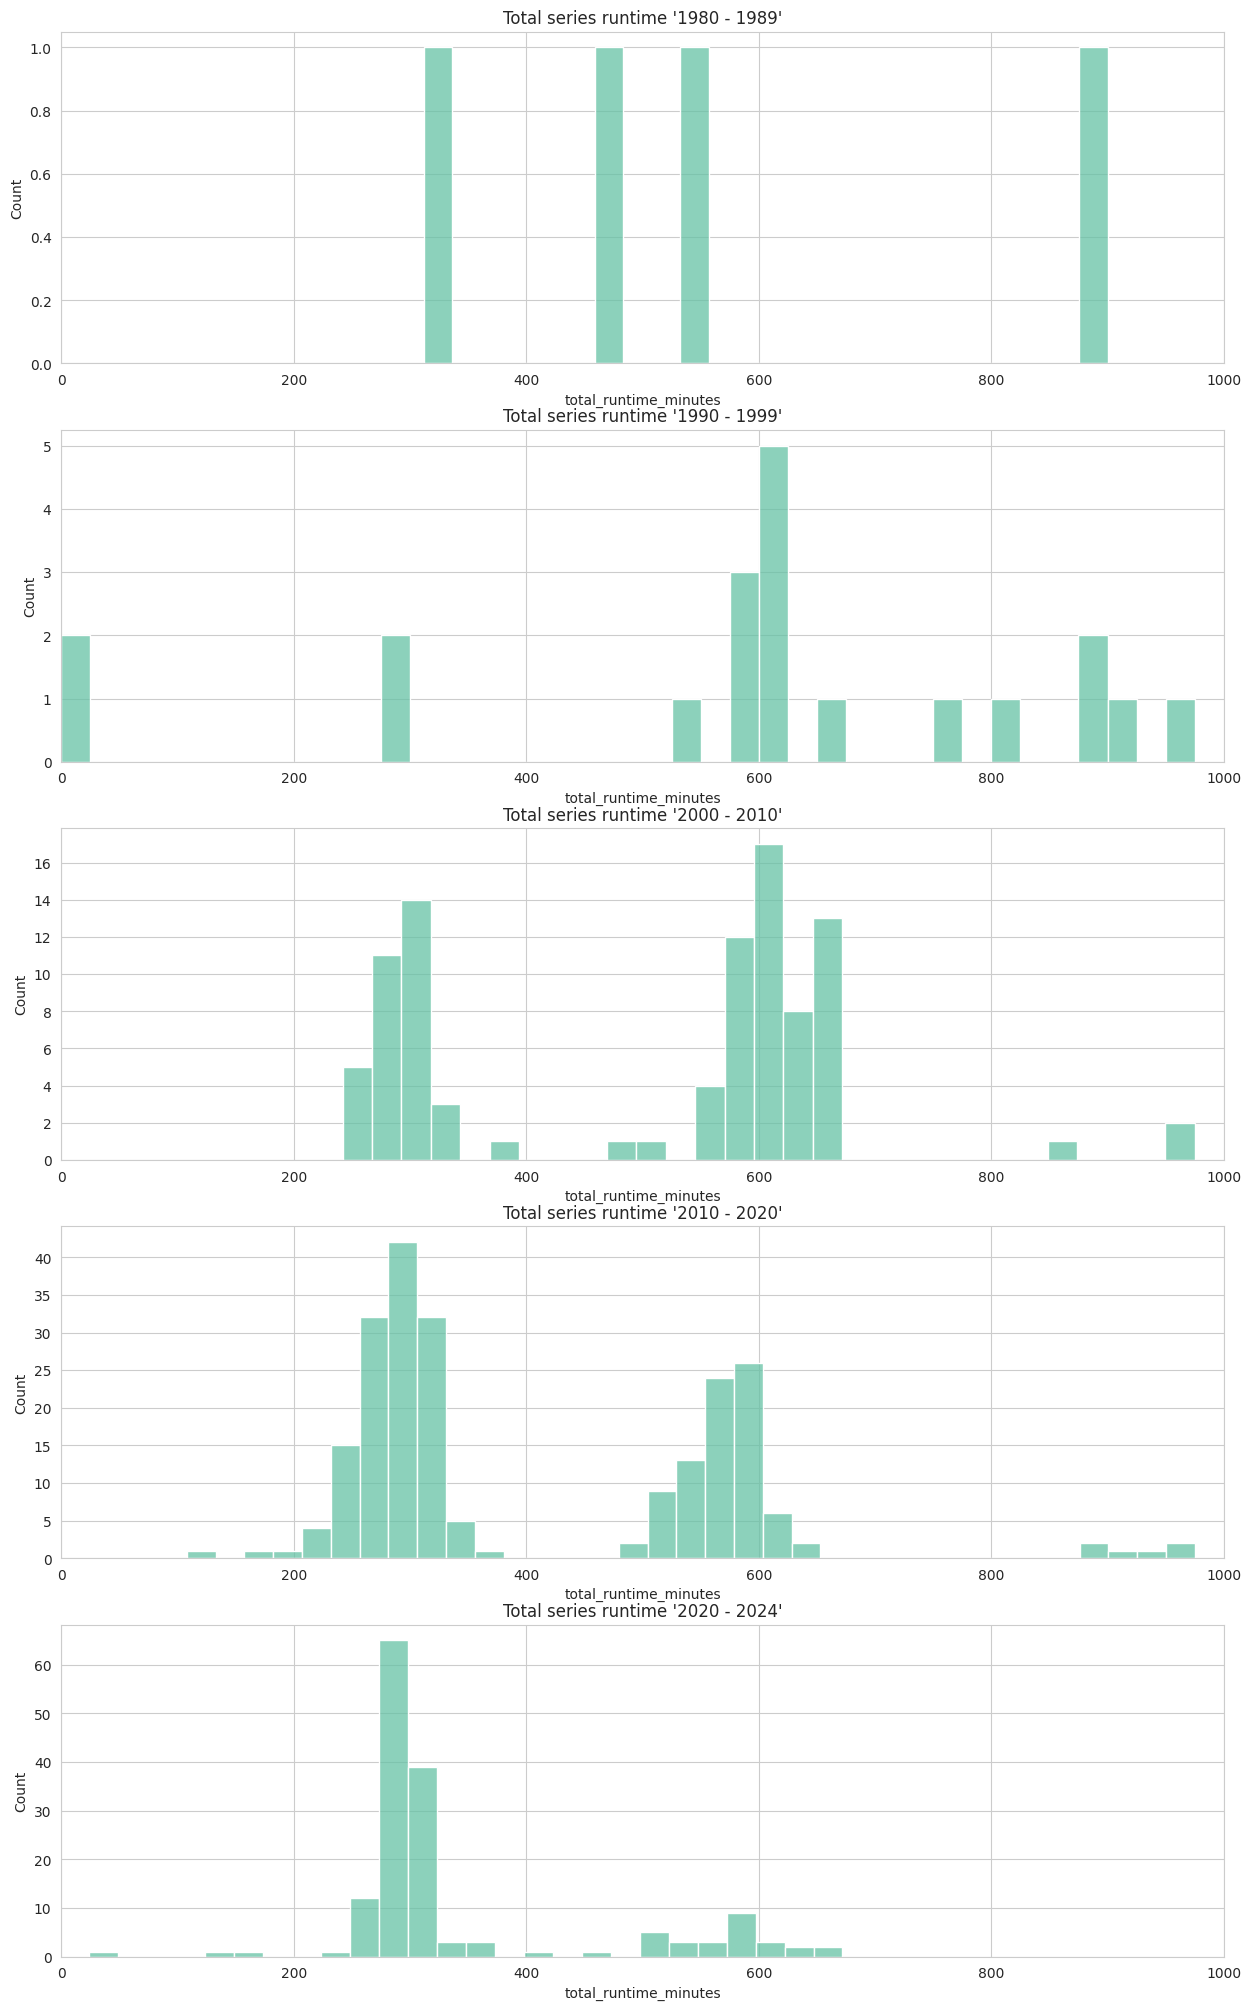

In [69]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 25), sharex=False, sharey=False)

sns.histplot(eighties, binwidth = bin_width,ax=axes[0])
axes[0].set_xlim(0,1000)
axes[0].set_title("Total series runtime '1980 - 1989'")

#

sns.histplot(nineties, binwidth = bin_width,ax=axes[1])
axes[1].set_xlim(0,1000)
axes[1].set_title("Total series runtime '1990 - 1999'")

#

sns.histplot(two_thousands, binwidth = bin_width,ax=axes[2])
axes[2].set_xlim(0,1000)
axes[2].set_title("Total series runtime '2000 - 2010'")

#

sns.histplot(twenty_tens, binwidth = bin_width,ax=axes[3])
axes[3].set_xlim(0,1000)
axes[3].set_title("Total series runtime '2010 - 2020'")

#

sns.histplot(twenty_twenties, binwidth = bin_width,ax=axes[4])
axes[4].set_xlim(0,1000)
axes[4].set_title("Total series runtime '2020 - 2024'")

plt.show()

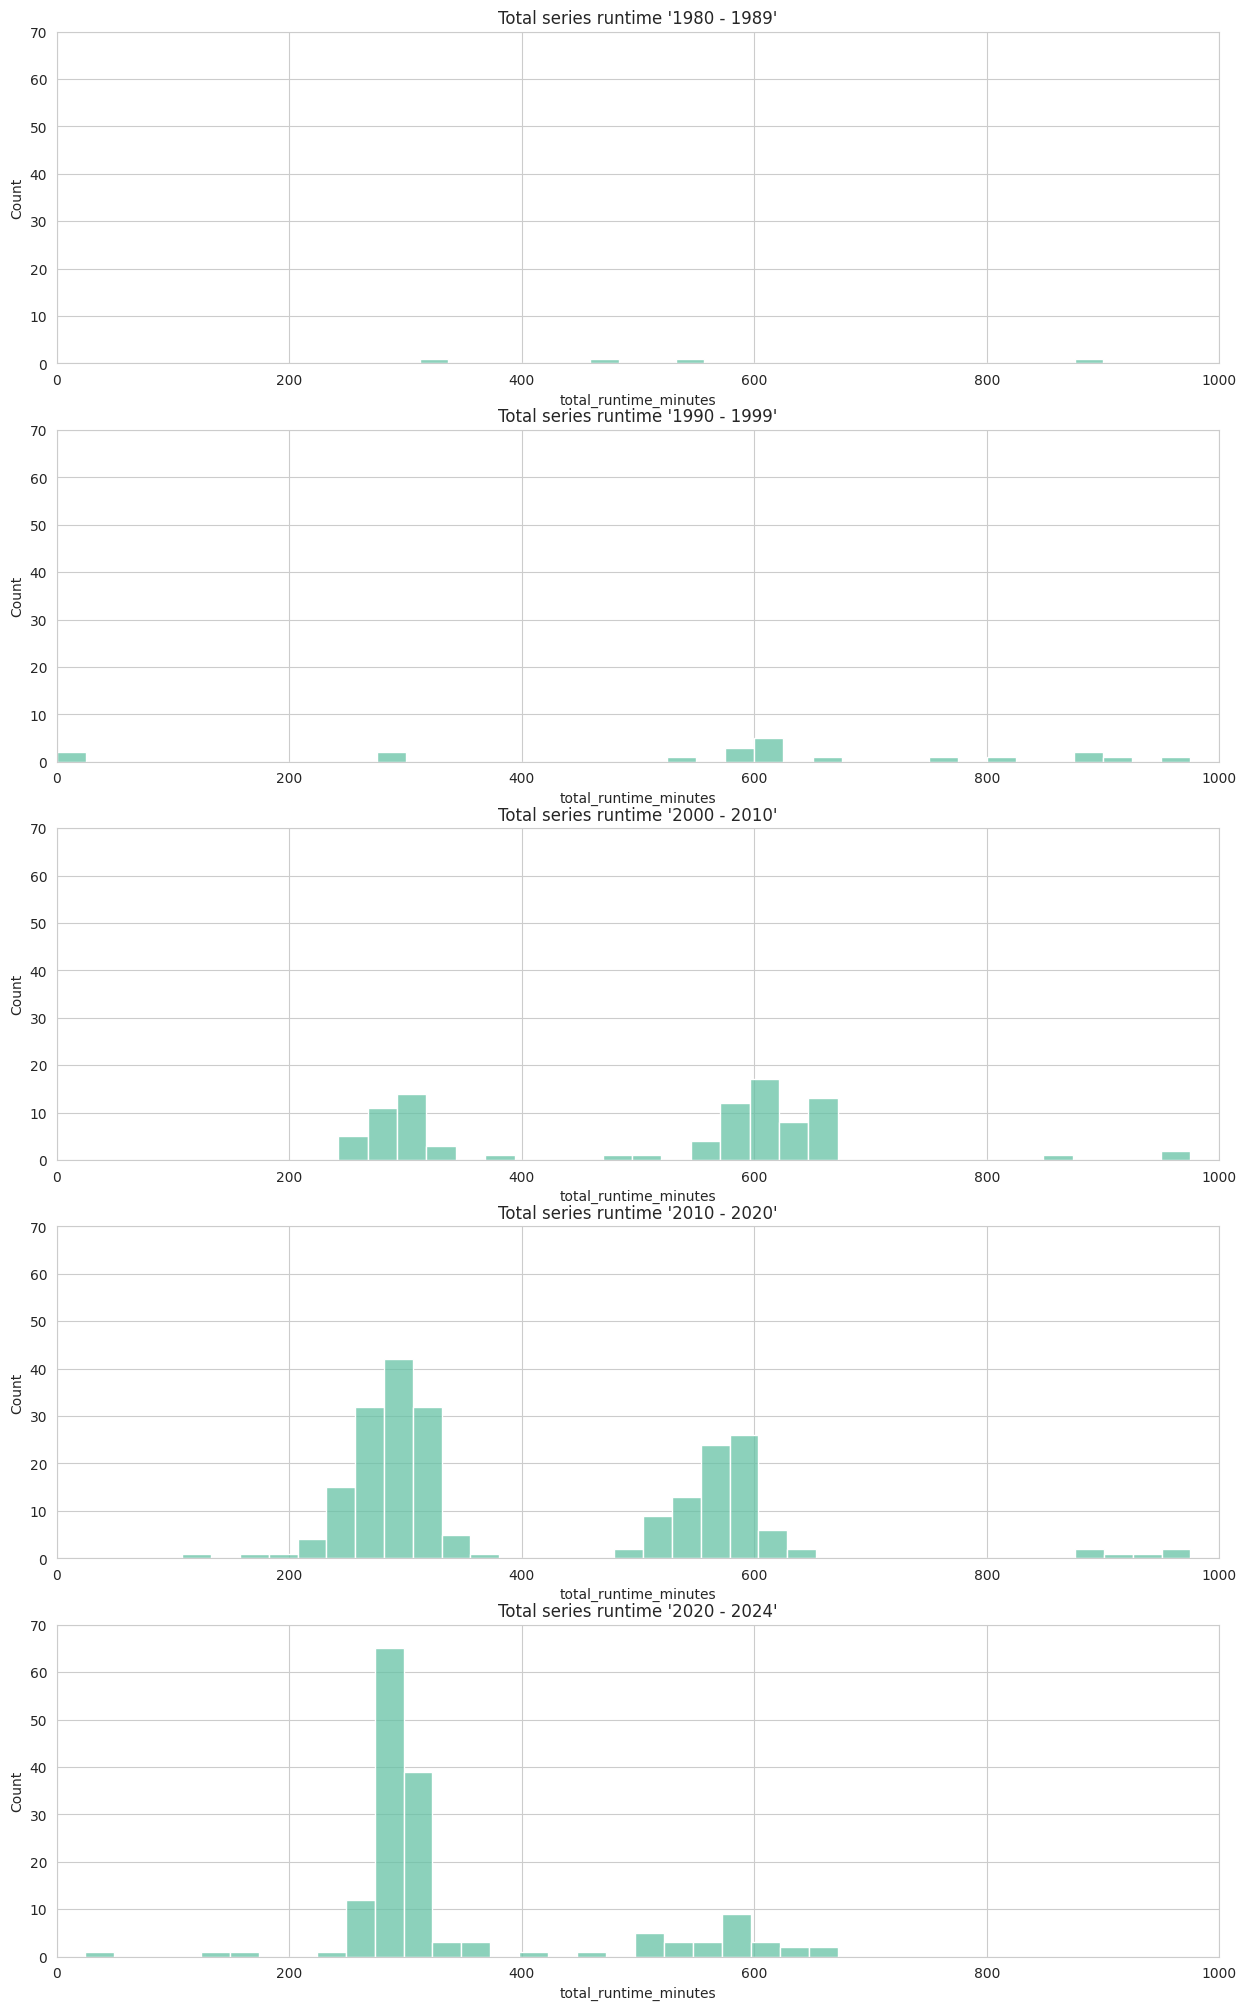

In [97]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 25), sharex=False, sharey=False)

sns.histplot(eighties, binwidth = bin_width,ax=axes[0])
axes[0].set_xlim(0,1000)
axes[0].set_ylim(0,70)
axes[0].set_title("Total series runtime '1980 - 1989'")

#

sns.histplot(nineties, binwidth = bin_width,ax=axes[1])
axes[1].set_xlim(0,1000)
axes[1].set_ylim(0,70)
axes[1].set_title("Total series runtime '1990 - 1999'")

#

sns.histplot(two_thousands, binwidth = bin_width,ax=axes[2])
axes[2].set_xlim(0,1000)
axes[2].set_ylim(0,70)
axes[2].set_title("Total series runtime '2000 - 2010'")

#

sns.histplot(twenty_tens, binwidth = bin_width,ax=axes[3])
axes[3].set_xlim(0,1000)
axes[3].set_ylim(0,70)
axes[3].set_title("Total series runtime '2010 - 2020'")

#

sns.histplot(twenty_twenties, binwidth = bin_width,ax=axes[4])
axes[4].set_xlim(0,1000)
axes[4].set_ylim(0,70)
axes[4].set_title("Total series runtime '2020 - 2024'")

plt.show()

The twin-peaked nature of the distribution makes a lot of these metrics (skewness,kurtosis,standard deviation for example) redundant. To gain insight from these would require us to investigate each peak seperately which would involve truncation which poses its own issues. However the change in some of these metrics can be sen graphically. We will look at this after a decade by decade comparison of distributions.

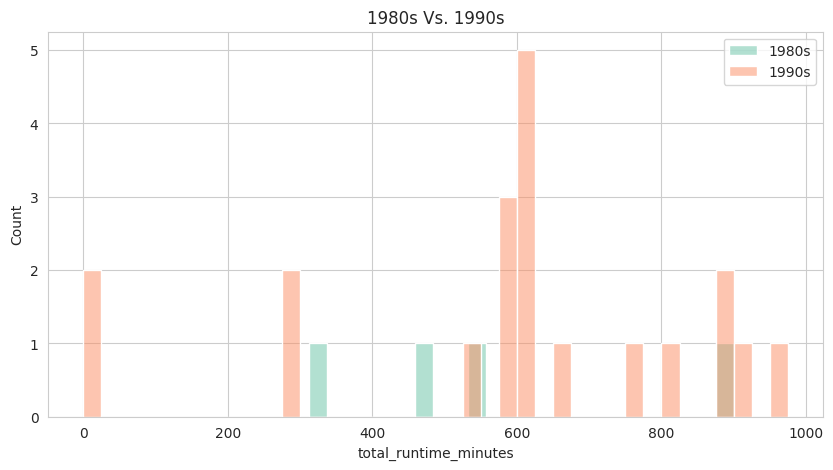

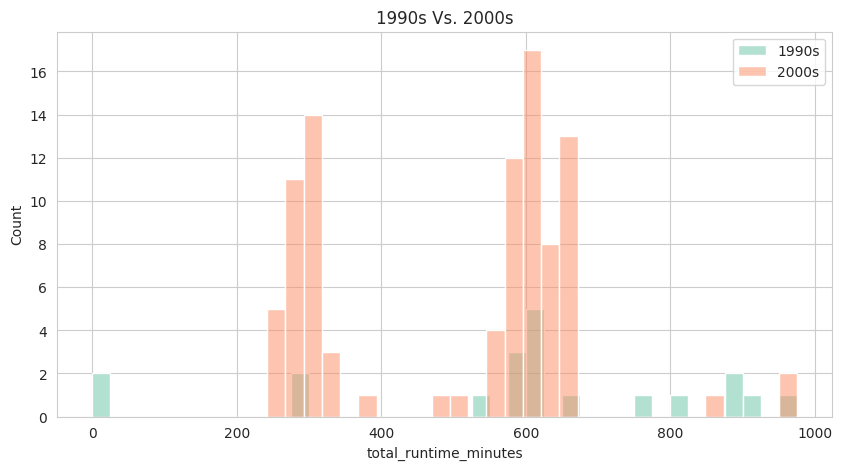

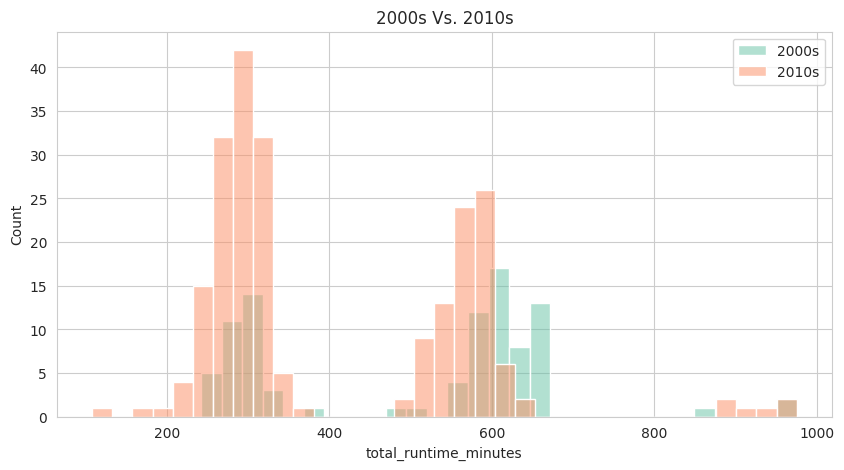

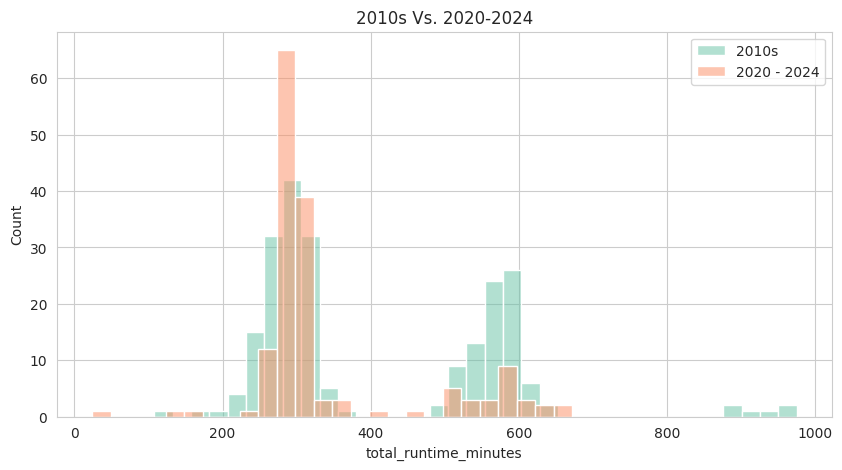

In [98]:
plt.figure(figsize=(10,5))

sns.histplot(eighties, binwidth = bin_width, alpha=0.5, label="1980s")
sns.histplot(nineties, binwidth = bin_width, alpha=0.5, label="1990s")

plt.legend()
plt.title("1980s Vs. 1990s")

#

plt.figure(figsize=(10,5))

sns.histplot(nineties, binwidth = bin_width, alpha=0.5, label="1990s")
sns.histplot(two_thousands, binwidth = bin_width, alpha=0.5, label="2000s")

plt.legend()

plt.title("1990s Vs. 2000s")

#

plt.figure(figsize=(10,5))

sns.histplot(two_thousands, binwidth = bin_width, alpha=0.5, label="2000s")
sns.histplot(twenty_tens, binwidth = bin_width, alpha=0.5, label="2010s")

plt.legend()

plt.title("2000s Vs. 2010s")

#

plt.figure(figsize=(10,5))

sns.histplot(twenty_tens, binwidth = bin_width, alpha=0.5, label="2010s")
sns.histplot(twenty_twenties, binwidth = bin_width, alpha=0.5, label="2020 - 2024")

plt.legend()

plt.title("2010s Vs. 2020-2024")
plt.show()

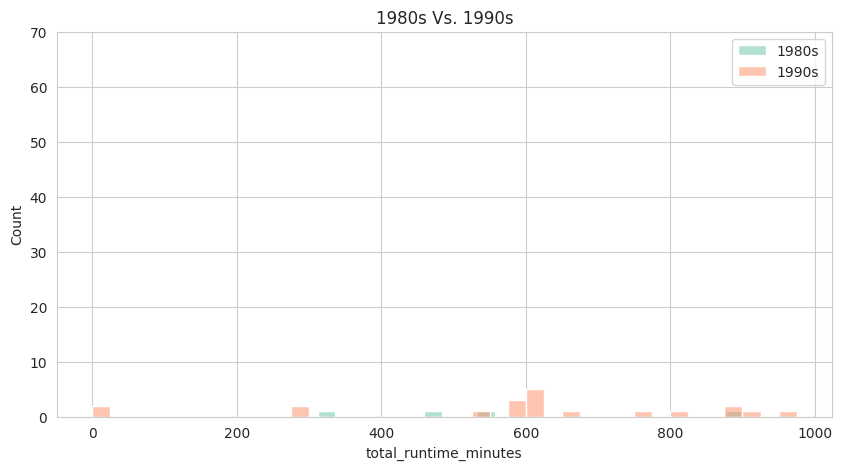

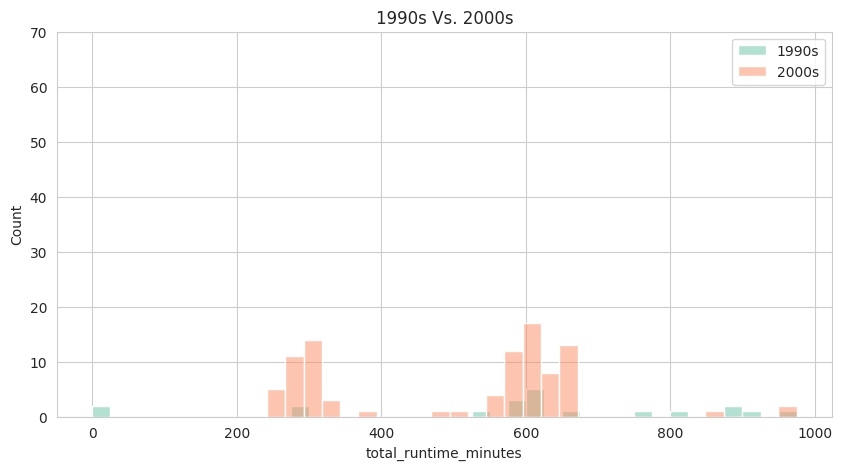

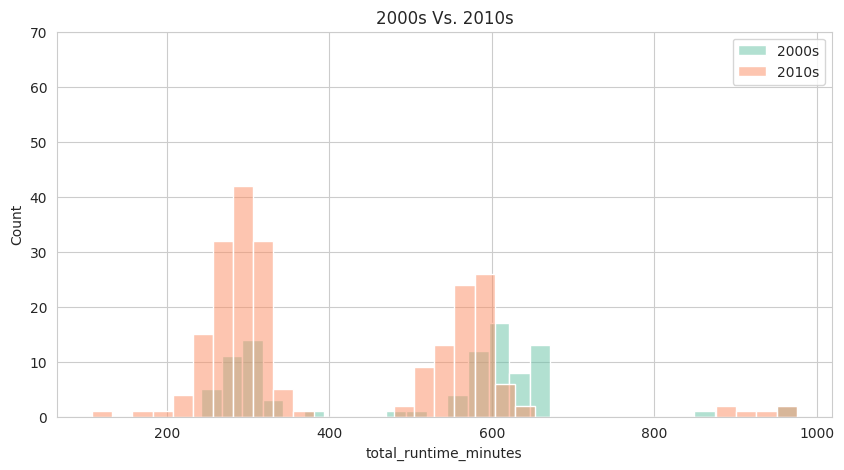

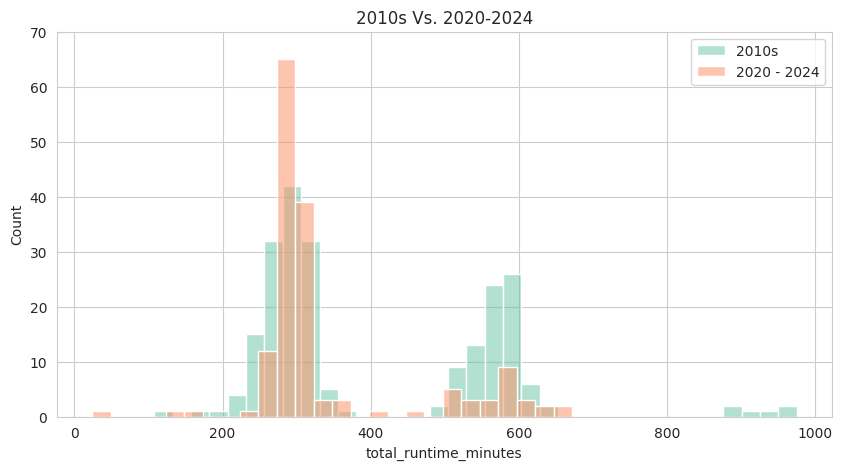

In [99]:
plt.figure(figsize=(10,5))

sns.histplot(eighties, binwidth = bin_width, alpha=0.5, label="1980s")
sns.histplot(nineties, binwidth = bin_width, alpha=0.5, label="1990s")

plt.legend()
plt.title("1980s Vs. 1990s")
plt.ylim(0,70)

#

plt.figure(figsize=(10,5))

sns.histplot(nineties, binwidth = bin_width, alpha=0.5, label="1990s")
sns.histplot(two_thousands, binwidth = bin_width, alpha=0.5, label="2000s")

plt.legend()
plt.title("1990s Vs. 2000s")
plt.ylim(0,70)

#

plt.figure(figsize=(10,5))

sns.histplot(two_thousands, binwidth = bin_width, alpha=0.5, label="2000s")
sns.histplot(twenty_tens, binwidth = bin_width, alpha=0.5, label="2010s")

plt.legend()
plt.title("2000s Vs. 2010s")
plt.ylim(0,70)

#

plt.figure(figsize=(10,5))

sns.histplot(twenty_tens, binwidth = bin_width, alpha=0.5, label="2010s")
sns.histplot(twenty_twenties, binwidth = bin_width, alpha=0.5, label="2020 - 2024")

plt.legend()
plt.title("2010s Vs. 2020-2024")
plt.ylim(0,70)
plt.show()


In [100]:
a = univariate_numerical_analysis(anime_tv_runtime_filtered,"total_runtime_minutes","total_runtime_minutes_overall")
b = univariate_numerical_analysis(eighties.to_frame(),"total_runtime_minutes","total_runtime_minutes_1980s")
c = univariate_numerical_analysis(nineties.to_frame(),"total_runtime_minutes","total_runtime_minutes_1990s")
d = univariate_numerical_analysis(two_thousands.to_frame(),"total_runtime_minutes","total_runtime_minutes_2000s")
e = univariate_numerical_analysis(twenty_tens.to_frame(),"total_runtime_minutes","total_runtime_minutes_2010s")
f = univariate_numerical_analysis(twenty_twenties.to_frame(),"total_runtime_minutes","total_runtime_minutes_2020-2024")
pd.concat([a,b,c,d,e,f])

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
total_runtime_minutes_overall,414.51,312.0,[276],176.23,975,300.00,0.85,0.22,0.43
total_runtime_minutes_1980s,561.75,517.5,"[312, 483, 552, 900]",247.04,588,198.75,1.00,1.73,0.44
total_runtime_minutes_1990s,593.90,624.0,[624],269.96,975,209.75,-0.94,0.72,0.45
total_runtime_minutes_2000s,501.01,576.0,[650],170.64,733,312.00,0.06,-0.47,0.34
total_runtime_minutes_2010s,410.20,312.0,"[288, 312]",168.36,867,288.00,0.93,0.39,0.41
total_runtime_minutes_2020-2024,334.77,288.0,[276],114.57,648,36.00,1.38,1.26,0.34


The twin-peaked nature of the distribution makes a lot of these metrics (skewness,kurtosis,standard deviation for example) redundant. To gain insight from these would require us to investigate each peak seperately which would involve truncation which poses its own issues. However the change in some of these metrics can be seen graphically.

Worth noting:  
- This is not an overall anime trend or even a trend of anime popular in its own time. This is a series of runtime distibutions of popular anime by 2024 standards.  
- There is a very low sample volume for the 1980s and 1990s.

The Trend:

- There does appear to some evidence (if weak) to suggest that by 2024 standards, popular (in the top 1000 rated) modern anime tends to be shorter in total run time compared to older popular anime (again by 2024 standards). The location of the peaks and how the lower one becomes dominant suggests that a favouring of lower episode count is the cause.

- The twin peak nature of run time caused by episode count appears to start in the 1990s. Favouring the higher episode counts. with each coming decade this dominace fades in  favour of the lower peak. The favouring of the lower peak can be seen in the mean, median, IQR, and standard deviation statisitics dropping over the decades as the lower peak becomes favoured to the point of being the only real peak in the first half of this decade.

### Movies

#### Distributions of the frame as a whole

By outliers we mean outliers in terms of the metric "total_runtime_minutes".  

Filtering by film duration does not affect the overall trend. (test this)

In [101]:
anime_movie_runtime = anime[(anime["type"] == "Movie") & (anime["episodes"] == 1)]

#anime_movie_runtime_filtered = iqr_outlier_strip(anime_movie_runtime,"episode_runtime_minutes") 
anime_movie_runtime_filtered = iqr_outlier_strip(anime_movie_runtime,"total_runtime_minutes")

First let us look at how long movie usually is:

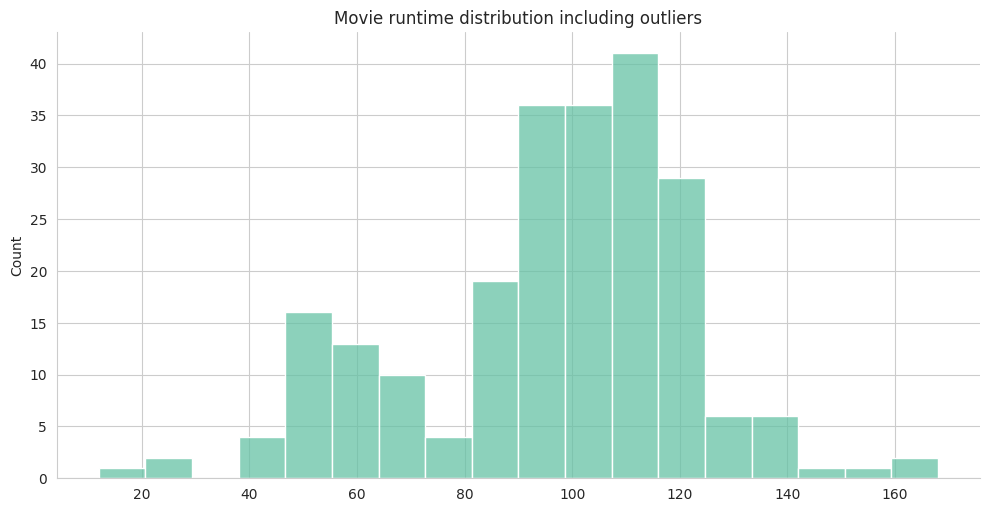

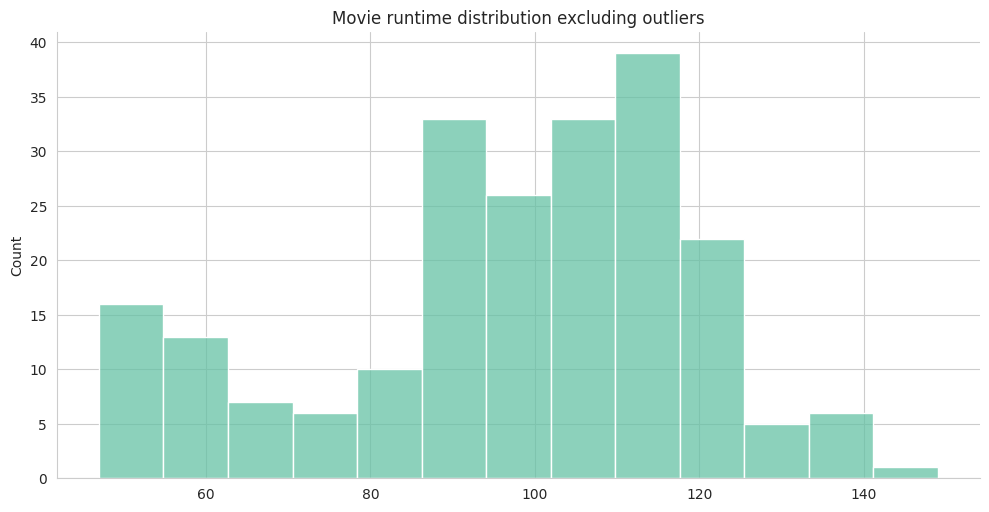

In [102]:

sns.displot(anime_movie_runtime["total_runtime_minutes"] / anime_movie_runtime["episodes"], height = 5, aspect = 2)
plt.title("Movie runtime distribution including outliers")

sns.displot(anime_movie_runtime_filtered["total_runtime_minutes"] / anime_movie_runtime_filtered["episodes"],height = 5, aspect = 2)
plt.title("Movie runtime distribution excluding outliers")

plt.show()

In [103]:
tmp = (anime_movie_runtime_filtered["total_runtime_minutes"] / anime_movie_runtime_filtered["episodes"]).to_frame()
tmp = tmp.rename(columns = {0:"film_runtime"})

univariate_numerical_analysis(tmp,"film_runtime","film_runtime")

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
film_runtime,96.93,101.0,[90.0],22.62,102.0,24.0,-0.58,-0.26,0.23


#### Distributions By Time Period

In [104]:
eighties_movie = anime_movie_runtime_filtered["total_runtime_minutes"][anime_movie_runtime_filtered["aired_first"].between(pd.Timestamp("1980-01-01"),pd.Timestamp("1989-12-31"))]
nineties_movie = anime_movie_runtime_filtered["total_runtime_minutes"][anime_movie_runtime_filtered["aired_first"].between(pd.Timestamp("1990-01-01"),pd.Timestamp("1999-12-31"))]
two_thousands_movie = anime_movie_runtime_filtered["total_runtime_minutes"][anime_movie_runtime_filtered["aired_first"].between(pd.Timestamp("2000-01-01"),pd.Timestamp("2009-12-31"))]
twenty_tens_movie = anime_movie_runtime_filtered["total_runtime_minutes"][anime_movie_runtime_filtered["aired_first"].between(pd.Timestamp("2010-01-01"),pd.Timestamp("2019-12-31"))]
twenty_twenties_movie = anime_movie_runtime_filtered["total_runtime_minutes"][anime_movie_runtime_filtered["aired_first"].between(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-12-31"))]

bin_width_movie = 5

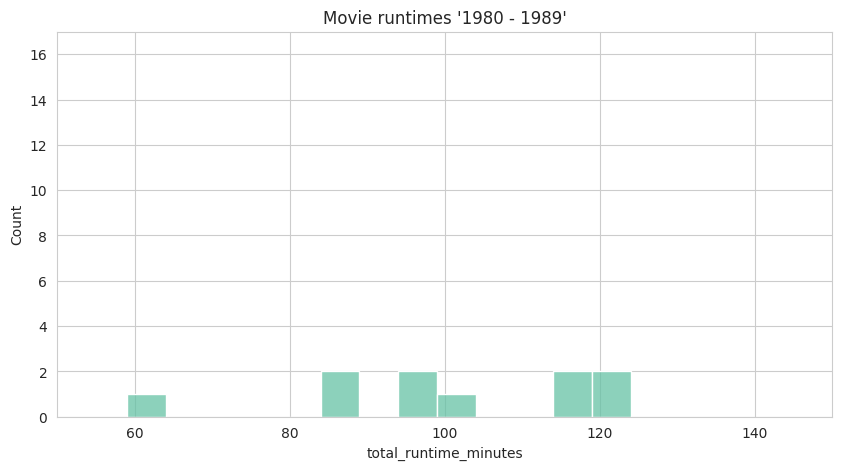

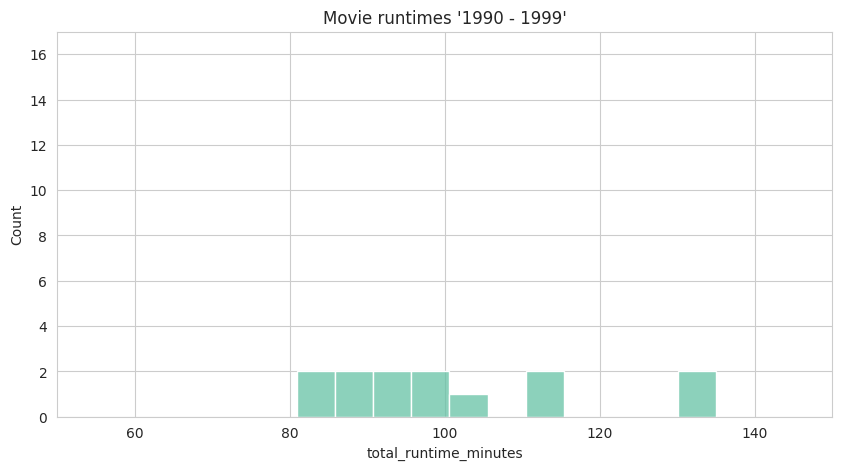

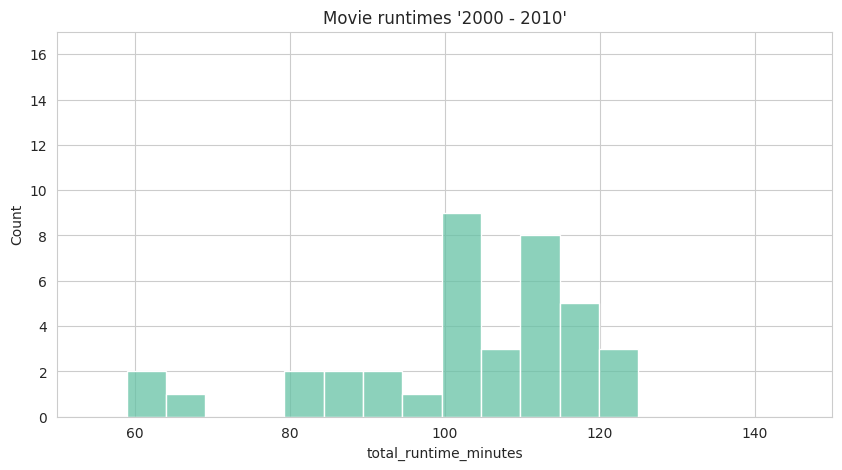

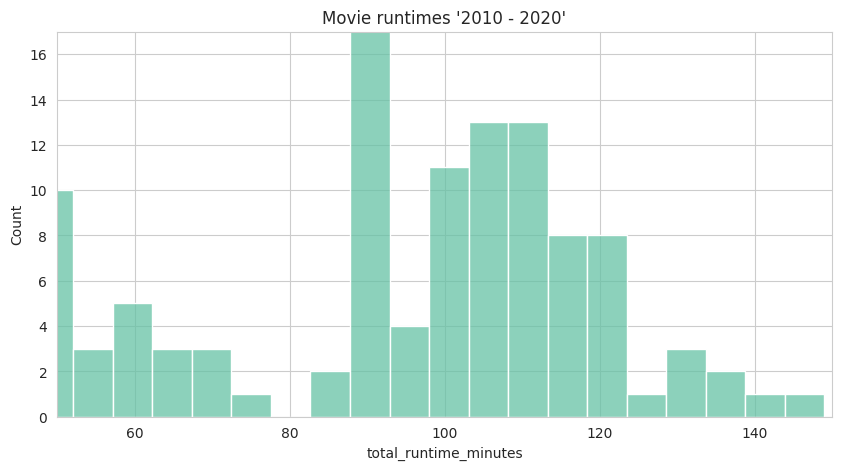

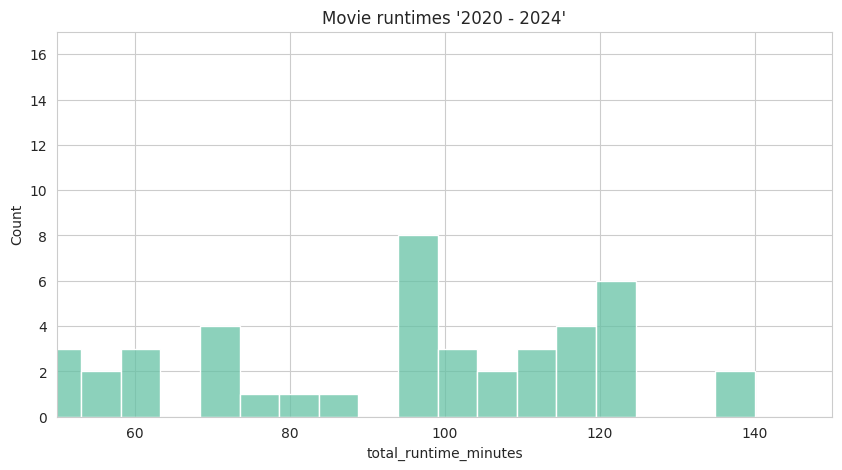

In [105]:
plt.figure(figsize=(10,5))
sns.histplot(eighties_movie,binwidth = bin_width_movie)
plt.xlim(50,150)
plt.ylim(0,17)
plt.title("Movie runtimes '1980 - 1989'")

#

plt.figure(figsize=(10,5))
sns.histplot(nineties_movie,binwidth = bin_width_movie)
plt.xlim(50,150)
plt.ylim(0,17)
plt.title("Movie runtimes '1990 - 1999'")

#

plt.figure(figsize=(10,5))
sns.histplot(two_thousands_movie,binwidth = bin_width_movie)
plt.xlim(50,150)
plt.ylim(0,17)
plt.title("Movie runtimes '2000 - 2010'")

#

plt.figure(figsize=(10,5))
sns.histplot(twenty_tens_movie,binwidth = bin_width_movie)
plt.xlim(50,150)
plt.ylim(0,17)
plt.title("Movie runtimes '2010 - 2020'")

#

plt.figure(figsize=(10,5))
sns.histplot(twenty_twenties_movie ,binwidth = bin_width_movie)
plt.xlim(50,150)
plt.ylim(0,17)
plt.title("Movie runtimes '2020 - 2024'")

plt.show()

decade by decade comparisons

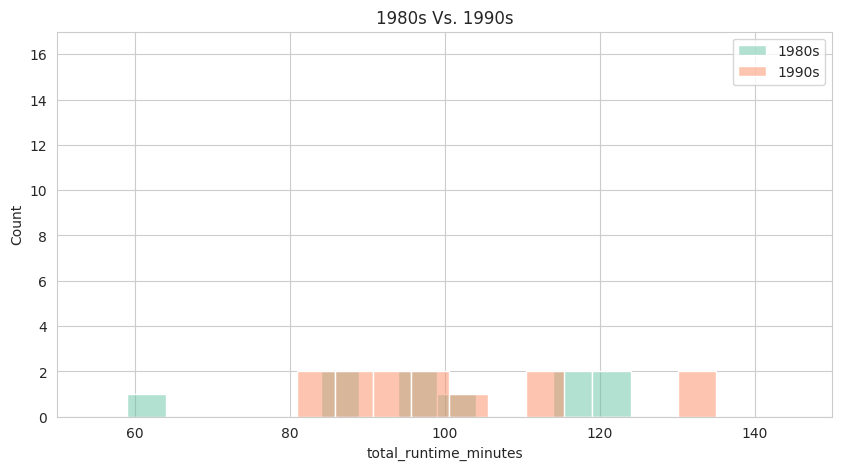

In [106]:
plt.figure(figsize=(10,5))

sns.histplot(eighties_movie, binwidth = bin_width_movie, alpha=0.5, label="1980s")
sns.histplot(nineties_movie, binwidth = bin_width_movie, alpha=0.5, label="1990s")

plt.xlim(50,150)
plt.ylim(0,17)

plt.legend()
plt.title("1980s Vs. 1990s")

plt.show()

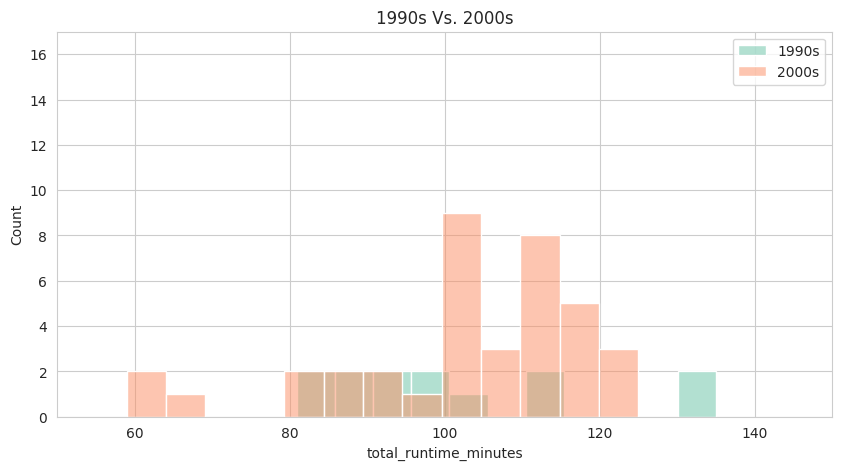

In [107]:
plt.figure(figsize=(10,5))

sns.histplot(nineties_movie, binwidth = bin_width_movie, alpha=0.5, label="1990s")
sns.histplot(two_thousands_movie, binwidth = bin_width_movie, alpha=0.5, label="2000s")

plt.xlim(50,150)
plt.ylim(0,17)

plt.legend()
plt.title("1990s Vs. 2000s")

plt.show()


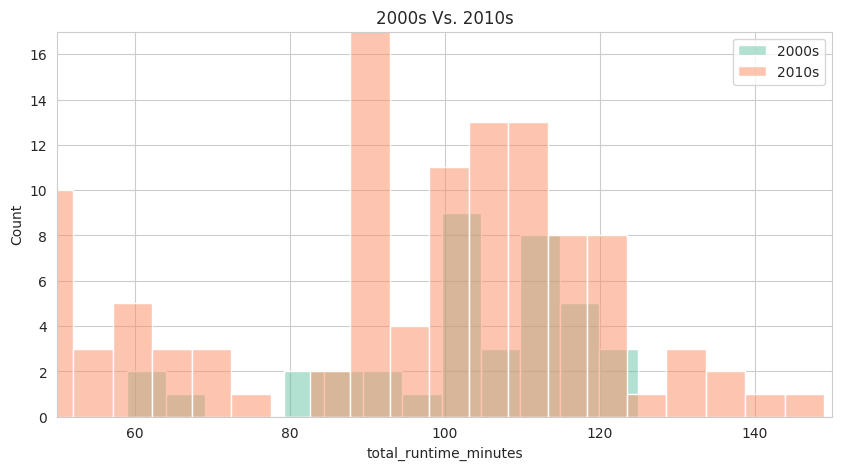

In [108]:
plt.figure(figsize=(10,5))

sns.histplot(two_thousands_movie, binwidth = bin_width_movie, alpha=0.5, label="2000s")
sns.histplot(twenty_tens_movie, binwidth = bin_width_movie, alpha=0.5, label="2010s")

plt.xlim(50,150)
plt.ylim(0,17)

plt.legend()
plt.title("2000s Vs. 2010s")

plt.show()


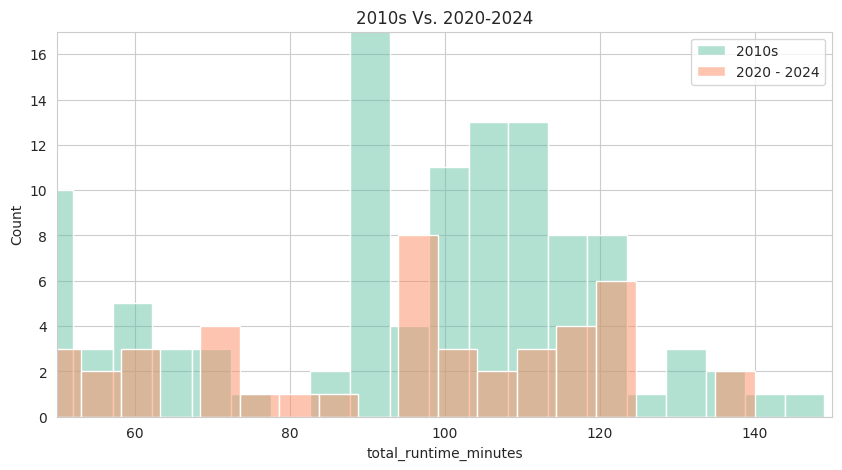

In [109]:
plt.figure(figsize=(10,5))

sns.histplot(twenty_tens_movie, binwidth = bin_width_movie, alpha=0.5, label="2010s")
sns.histplot(twenty_twenties_movie, binwidth = bin_width_movie, alpha=0.5, label="2020 - 2024")

plt.xlim(50,150)
plt.ylim(0,17)

plt.legend()
plt.title("2010s Vs. 2020-2024")

plt.show()

In [110]:
a = univariate_numerical_analysis(anime_movie_runtime_filtered,"total_runtime_minutes","total_runtime_minutes_overall")
b = univariate_numerical_analysis(eighties_movie.to_frame(),"total_runtime_minutes","total_runtime_minutes_1980s")
c = univariate_numerical_analysis(nineties_movie.to_frame(),"total_runtime_minutes","total_runtime_minutes_1990s")
d = univariate_numerical_analysis(two_thousands_movie.to_frame(),"total_runtime_minutes","total_runtime_minutes_2000s")
e = univariate_numerical_analysis(twenty_tens_movie.to_frame(),"total_runtime_minutes","total_runtime_minutes_2010s")
f = univariate_numerical_analysis(twenty_twenties_movie.to_frame(),"total_runtime_minutes","total_runtime_minutes_2020-2024")
pd.concat([a,b,c,d,e,f])

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
total_runtime_minutes_overall,96.93,101.0,[90],22.62,102,24.00,-0.58,-0.26,0.23
total_runtime_minutes_1980s,101.10,100.5,[124],20.27,65,26.25,-0.83,0.67,0.20
total_runtime_minutes_1990s,101.38,99.0,"[81, 82, 86, 89, 93, 94, 99, 100, 102, 111, 11...",17.49,54,22.00,0.92,0.06,0.17
total_runtime_minutes_2000s,102.39,105.5,"[100, 111]",16.29,66,15.00,-1.22,1.30,0.16
total_runtime_minutes_2010s,95.04,99.5,[90],24.04,102,22.25,-0.48,-0.41,0.25
total_runtime_minutes_2020-2024,94.65,97.0,[104],25.37,92,43.00,-0.34,-0.96,0.27


From the plots themselves there does not appear to be any trend apart from a general range of 90-125 minute runtime, and that the 2010 produced a lot of popular (by 2024 standards) anime movies.

From the numerical analysis there are small fluctuations, but a lot of this can be explained by low sample volume for any varying period. There is no over-arching trend that is clearly visibile.

It is unclear wheter our inability to detect a trend in the variation of movie length distribution is due to low sampling or because it does not exist. All we can say in terms of trends is that we have not been able to find evidence of a one with the current data.

However some metrics are stable: mean, median, coefficient of variance.  
Some have more variation : standard deviation , iqr
and some flucate all over : kurtosis, skewness

This suggests a lot of statistical noise around a clear mean and median in a distribution that would benfit from a higher sampling volume.

## Q2) Is there a correlation between Studio,Genre and Rating.

average rating-score by genre

In [111]:
gsts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 1 to 999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          771 non-null    float64
 1   studios        771 non-null    object 
 2   source         771 non-null    object 
 3   action         771 non-null    object 
 4   adventure      771 non-null    object 
 5   avant_garde    771 non-null    object 
 6   award_winning  771 non-null    object 
 7   boys_love      771 non-null    object 
 8   comedy         771 non-null    object 
 9   drama          771 non-null    object 
 10  ecchi          771 non-null    object 
 11  fantasy        771 non-null    object 
 12  girls_love     771 non-null    object 
 13  gourmet        771 non-null    object 
 14  horror         771 non-null    object 
 15  mystery        771 non-null    object 
 16  romance        771 non-null    object 
 17  sci-fi         771 non-null    object 
 18  slice_of_life  

In [112]:
temp_long = gsts.melt(
    id_vars=["score"],
    value_vars = genres_list,
    var_name = "genre",
    value_name = "is_genre"
)

print(temp_long)

temp_long = temp_long[temp_long["is_genre"] == 1]

print(temp_long)

genre_mean =(
    temp_long
    .groupby("genre", as_index = False)["score"]
    .mean()
    .rename(columns = {"score" : "mean_score"})
    .sort_values("mean_score", ascending = False)
    .reset_index(drop=True)
    )

genre_mean


       score     genre is_genre
0       9.38    action    False
1       9.09    action     True
2       9.07    action    False
3       9.06    action     True
4       9.05    action     True
...      ...       ...      ...
14644   7.80  suspense    False
14645   7.80  suspense    False
14646   7.80  suspense    False
14647   7.80  suspense    False
14648   7.80  suspense    False

[14649 rows x 3 columns]
       score     genre is_genre
1       9.09    action     True
3       9.06    action     True
4       9.05    action     True
5       9.04    action     True
6       9.04    action     True
...      ...       ...      ...
14599   7.83  suspense     True
14600   7.83  suspense     True
14605   7.83  suspense     True
14606   7.82  suspense     True
14611   7.82  suspense     True

[2287 rows x 3 columns]


,genre,mean_score
0,suspense,8.281923
1,sports,8.266250
2,award_winning,8.257875
3,supernatural,8.237891
4,slice_of_life,8.234359
5,drama,8.204931
6,avant_garde,8.180000
7,sci-fi,8.179944
8,action,8.177678
9,mystery,8.176913


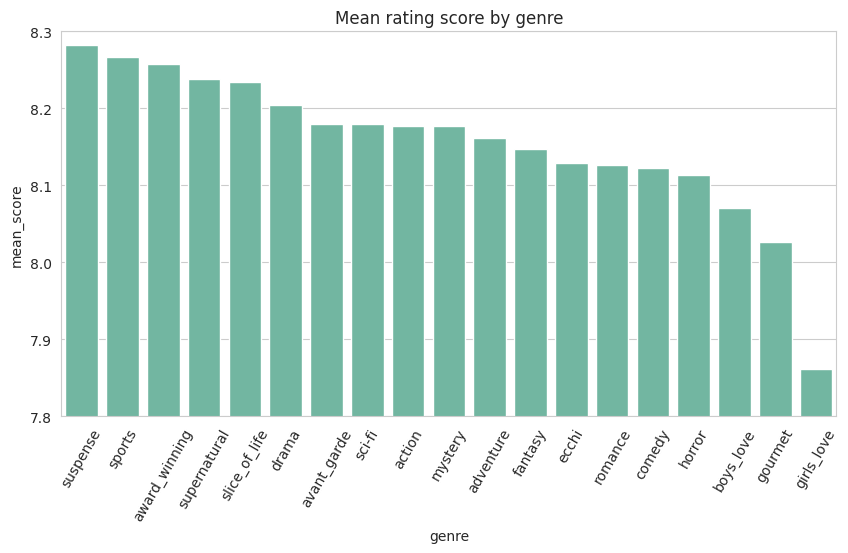

In [113]:
plt.figure(figsize =(10,5))

sns.barplot(genre_mean, x="genre", y="mean_score")
plt.ylim(7.8,8.3)
plt.xticks(rotation=60)
plt.title("Mean rating score by genre")
plt.show()

In [114]:
gsts["genre"] = gsts[genres_list].apply(lambda _: _.index[_].tolist(),axis=1)


exploded_studios = (
    gsts[["studios","score","genre"]]
      .explode('studios'))                               # one row per studio

In [115]:
# exploded_studios["genre"] = exploded_studios[genres_list].apply(lambda _: _.index[_].tolist(),axis=1)     # genres to list # investigate logic of this again # is boolean masking magic

# exploded_studios = exploded_studios.drop(columns = genres_list)

top10_studios = exploded_studios["studios"].value_counts().head(10).index

exploded_studios_genres = exploded_studios.explode("genre")

exploded_studios_genres_grouped = exploded_studios_genres.groupby(["studios","genre"]).agg("mean")

exploded_studios_genres


,studios,score,genre
rank,,,
1,Madhouse,9.38,adventure
1,Madhouse,9.38,drama
1,Madhouse,9.38,fantasy
2,Bones,9.09,action
2,Bones,9.09,adventure
...,...,...,...
998,TMS Entertainment,7.80,comedy
998,TMS Entertainment,7.80,mystery
999,TMS Entertainment,7.80,adventure


In [116]:
top10_studios_long = exploded_studios_genres[exploded_studios_genres["studios"].isin(top10_studios)]

top10_studios_long_grouped = top10_studios_long.groupby(["studios","genre"]).agg("mean")

top10_studios_long_grouped

score
studios        genre                 
A-1 Pictures   action        8.166667
               adventure     8.074000
               comedy        8.268333
               drama         8.330000
               fantasy       8.115455
...                               ...
Toei Animation romance       7.966667
               sci-fi        8.050000
               sports        8.790000
               supernatural  8.420000
               suspense      8.420000

[122 rows x 1 columns]

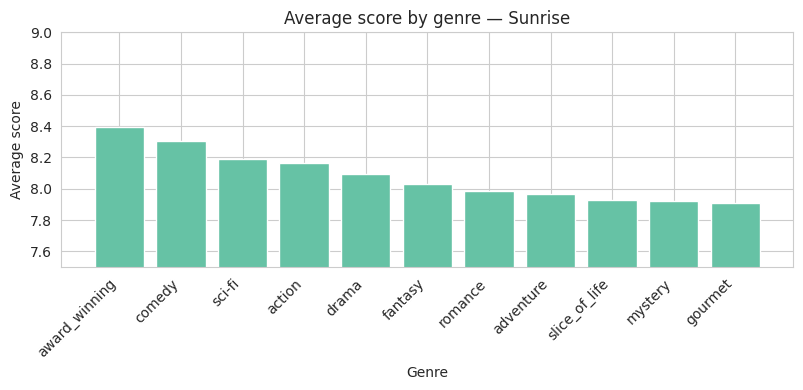

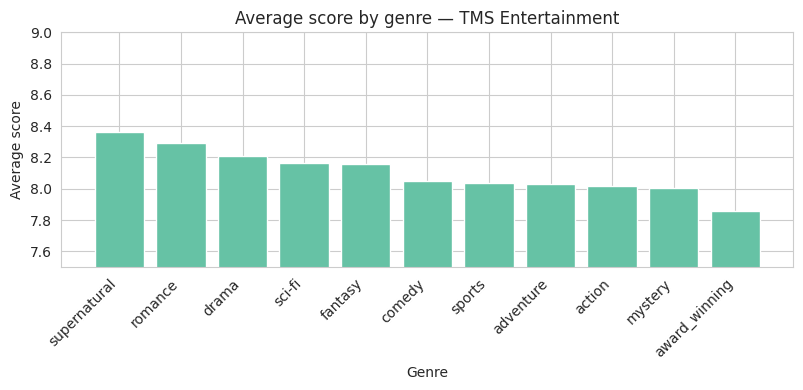

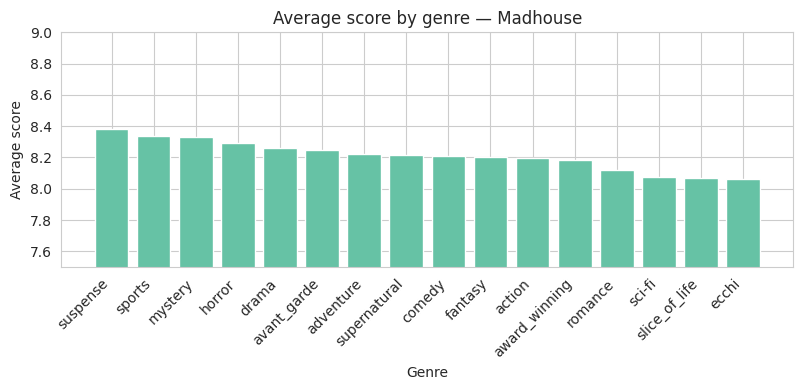

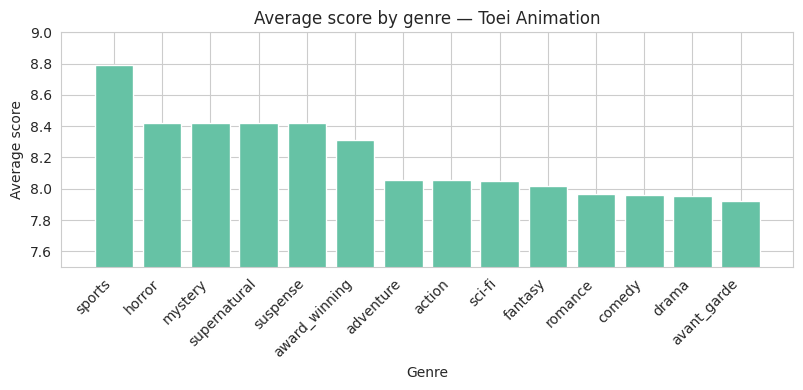

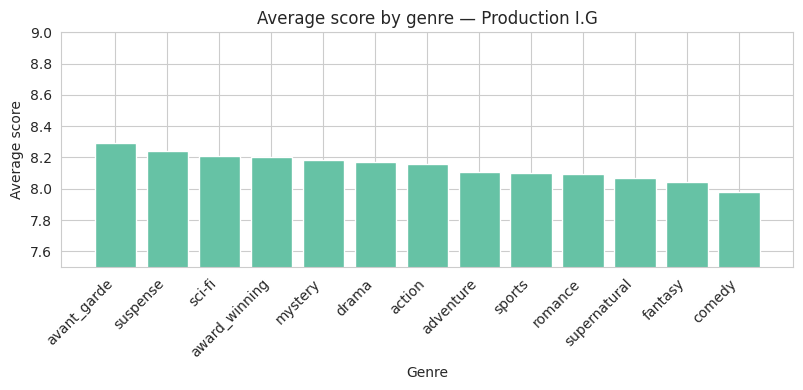

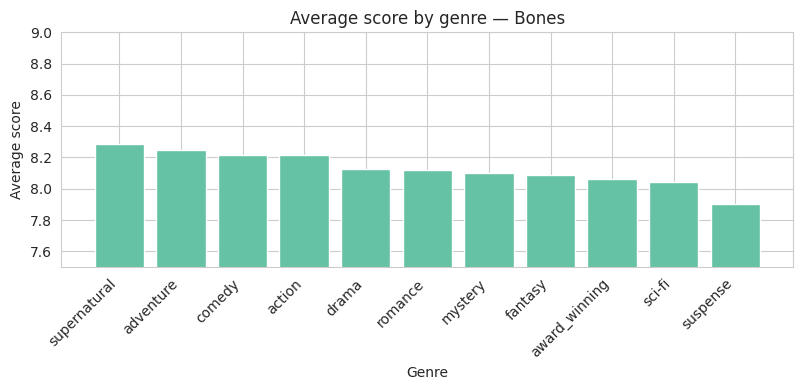

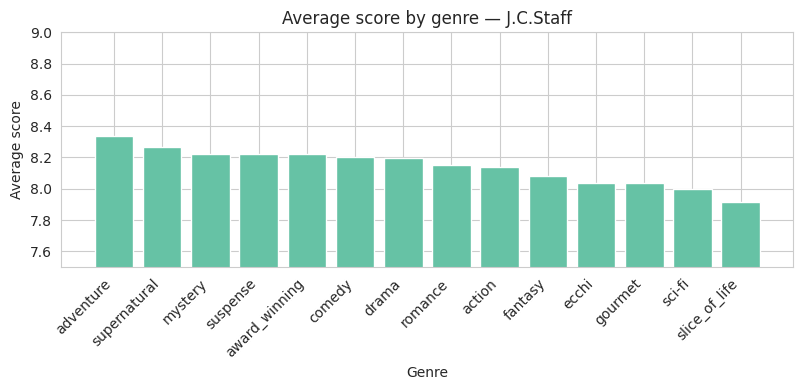

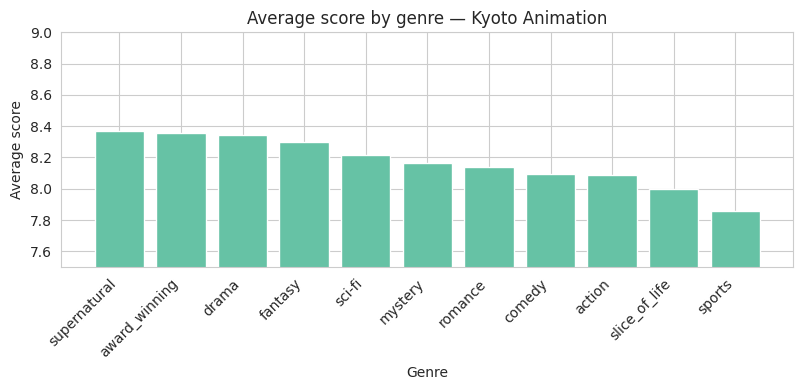

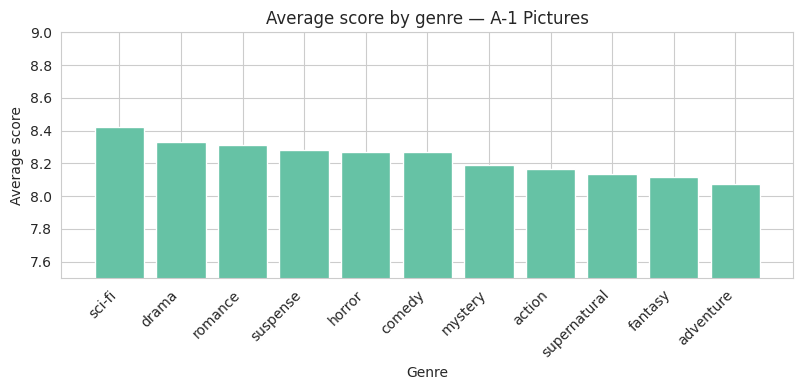

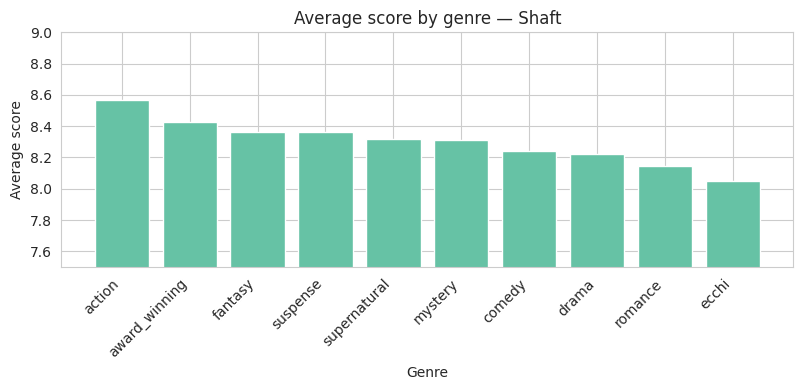

In [117]:
for _ in top10_studios:


    studio = _

    sub = top10_studios_long_grouped.loc[studio,"score"].sort_values(ascending = False)                                 # optional, nice ordering

    plt.figure(figsize=(8,4))
    plt.bar(sub.index, sub.values)
    plt.title(f"Average score by genre — {studio}")
    plt.ylabel("Average score")
    plt.xlabel("Genre")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.ylim(7.5,9.0)
    plt.show()

    #print(sub.index)



The fact that studios do not produce all genres does indeed show that there is correlation between genre and studio. The degree of which can be further investigated by seeing the % of total genres the average studios produces.

We can also see a relationship between genre and and average rating on a per studio basis. to see overall genre performance through the orginal frame requires different analysis.

In [118]:
exploded_genres = (
    gsts[["studios","score","genre"]]
      .explode("genre"))   

In [119]:
top_5_genres = exploded_genres["genre"].value_counts().head(5).index

exploded_genres_studios = exploded_genres.explode("studios")

exploded_genres_studios.groupby(["genre","studios"]).agg("mean")

# display(top_5_genres)

score
genre    studios                    
action   8bit               8.146667
         A-1 Pictures       8.166667
         A.C.G.T.           8.170000
         AHA Entertainment  7.950000
         AIC                8.330000
...                              ...
suspense Toei Animation     8.420000
         Triangle Staff     8.090000
         White Fox          8.475000
         Wit Studio         8.348750
         ufotable           8.185000

[706 rows x 1 columns]

In [120]:
top5_genres_long = exploded_genres_studios[exploded_genres_studios["genre"].isin(top_5_genres)]

top5_genres_long_grouped = top5_genres_long.groupby(["genre","studios"]).agg("mean")

top5_genres_long_grouped

score
genre   studios                    
action  8bit               8.146667
        A-1 Pictures       8.166667
        A.C.G.T.           8.170000
        AHA Entertainment  7.950000
        AIC                8.330000
...                             ...
fantasy Trigger            7.932500
        White Fox          8.330000
        Wit Studio         8.127500
        Xebec              7.820000
        ufotable           8.392308

[370 rows x 1 columns]

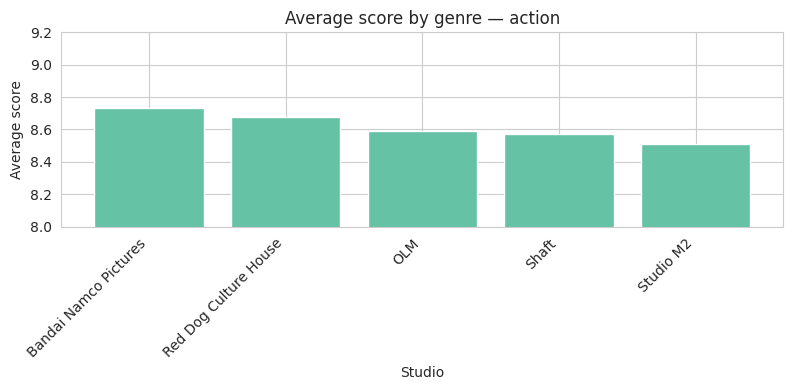

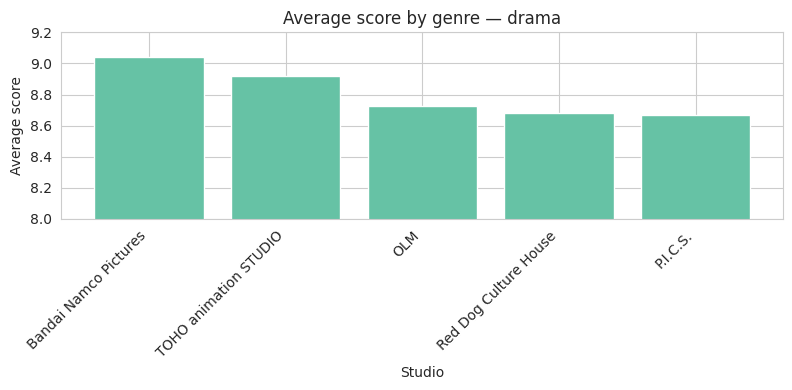

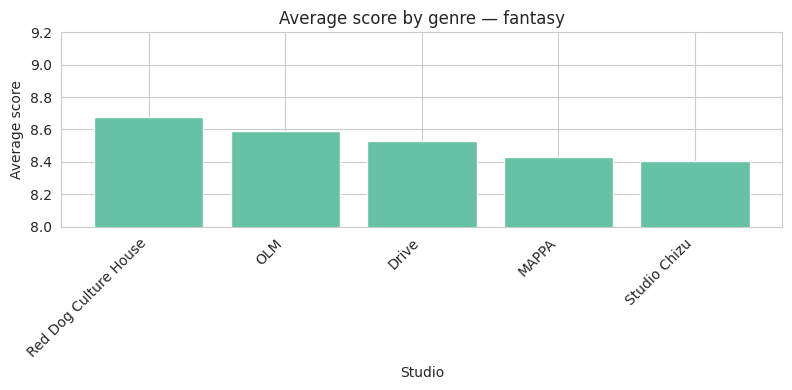

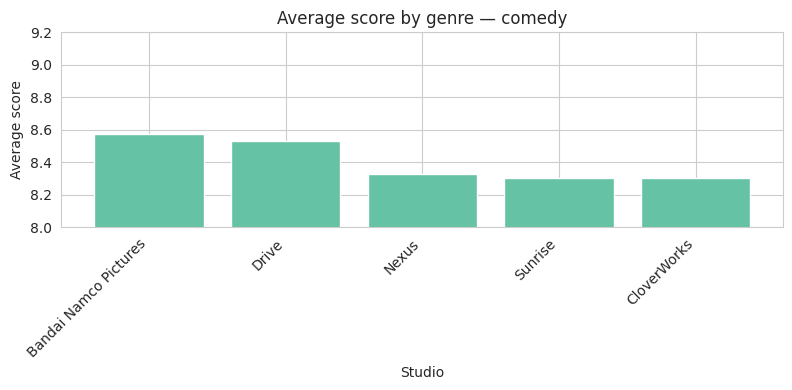

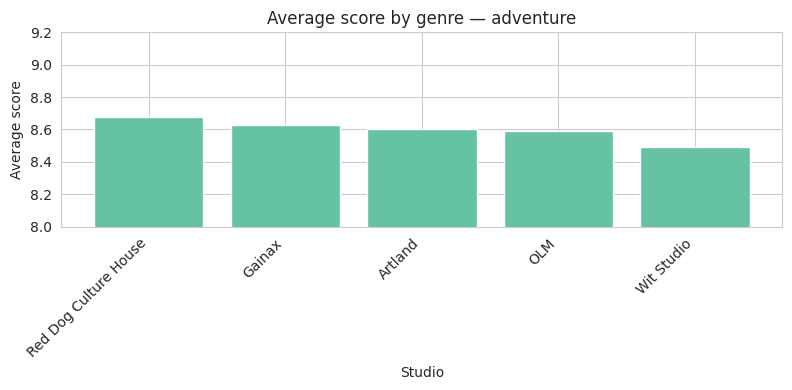

In [121]:
for _ in top_5_genres:

    genre = _

    sub = top5_genres_long_grouped.loc[genre,"score"].sort_values(ascending = False)
    sub = sub.head(5).sort_values(ascending = False)                                 # optional, nice ordering

    plt.figure(figsize=(8,4))
    plt.bar(sub.index, sub.values)
    plt.title(f"Average score by genre — {genre}")
    plt.ylabel("Average score")
    plt.xlabel("Studio")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.ylim(8,9.2)
    plt.show()

<Axes: xlabel='studios', ylabel='genre'>

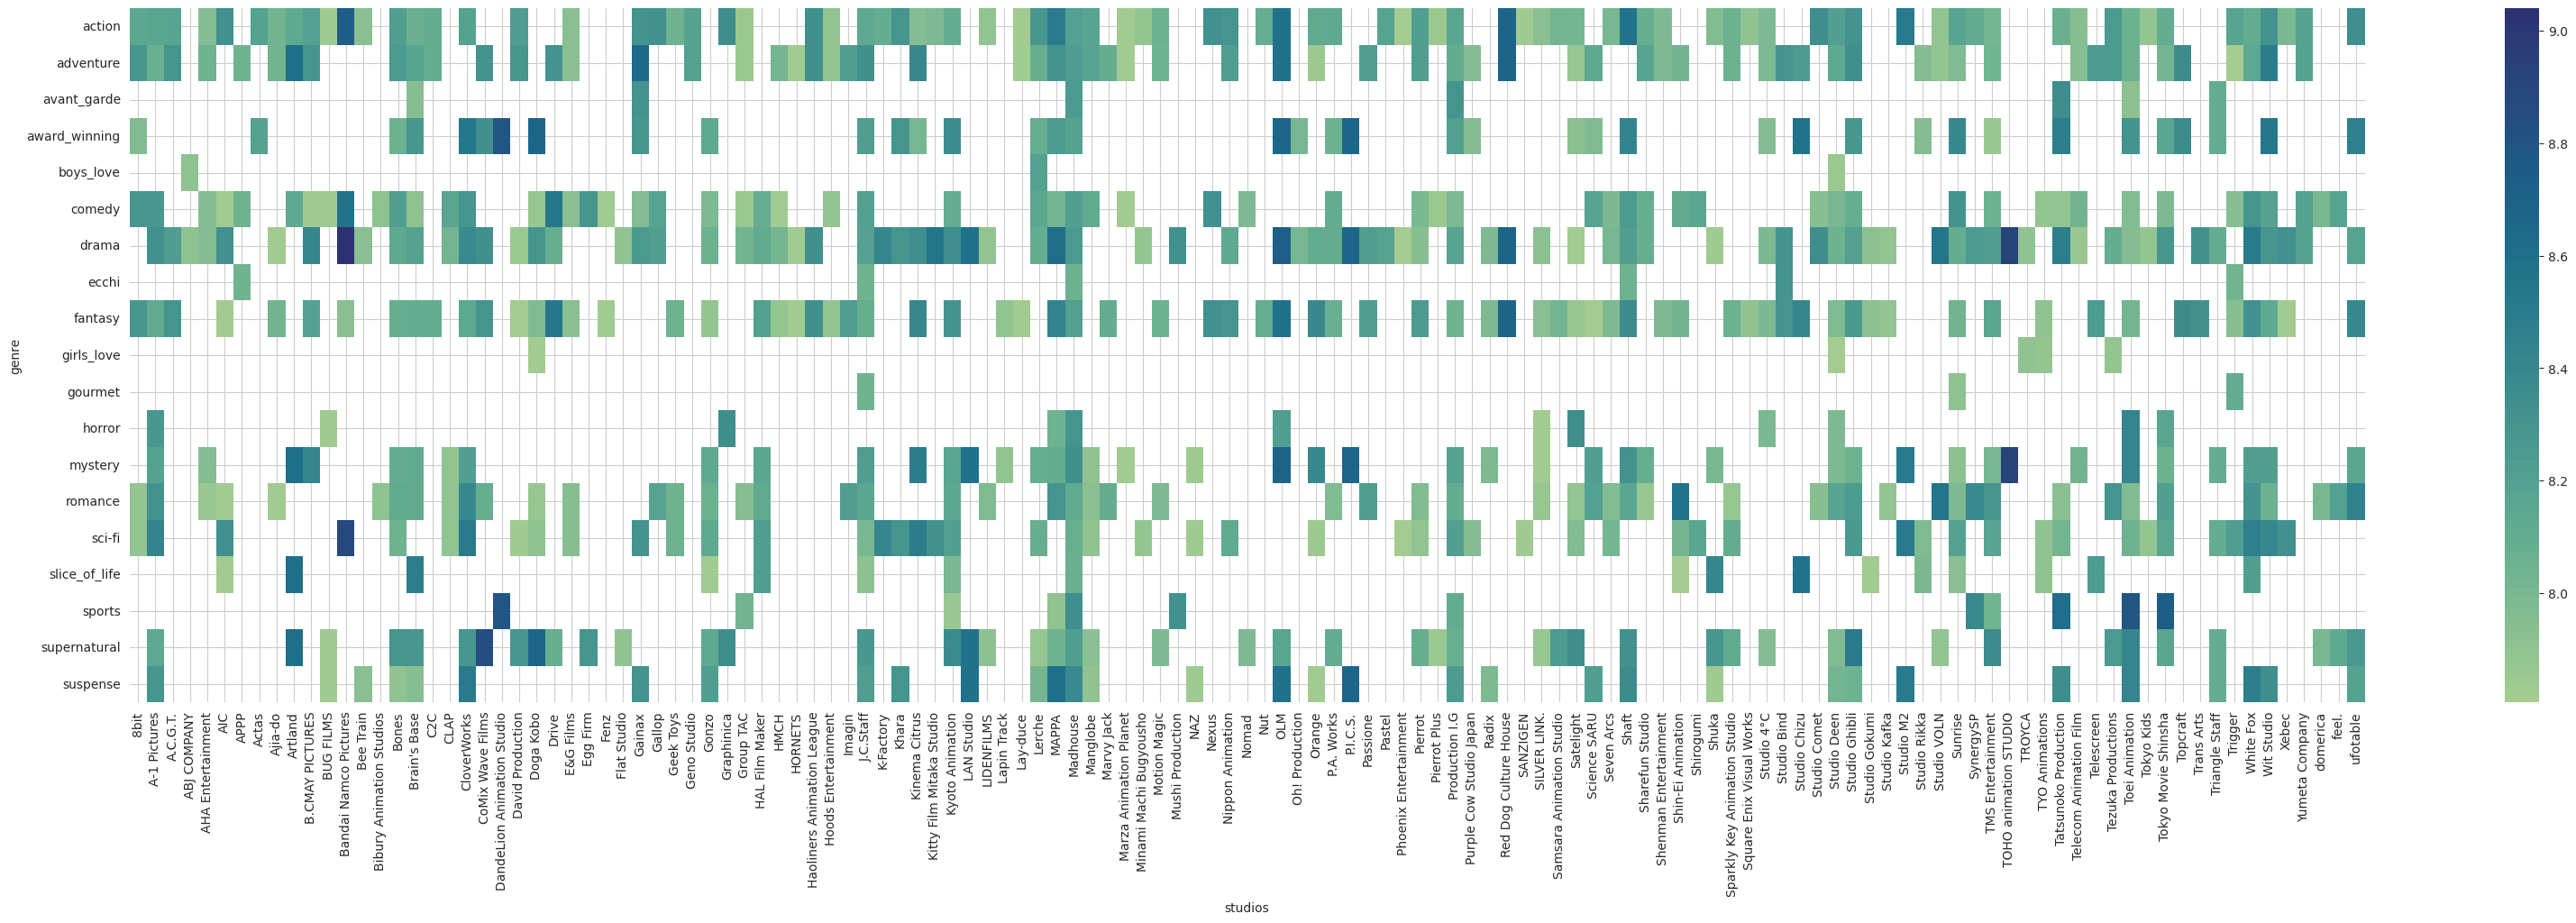

In [122]:
exploded_studios_genres_grouped = exploded_studios_genres.groupby(["studios","genre"]).agg("mean").reset_index()
plt.figure(figsize = (40,10))
sns.heatmap(
    exploded_studios_genres_grouped
    .pivot(index="genre",columns="studios",values="score"),
    cmap="crest")

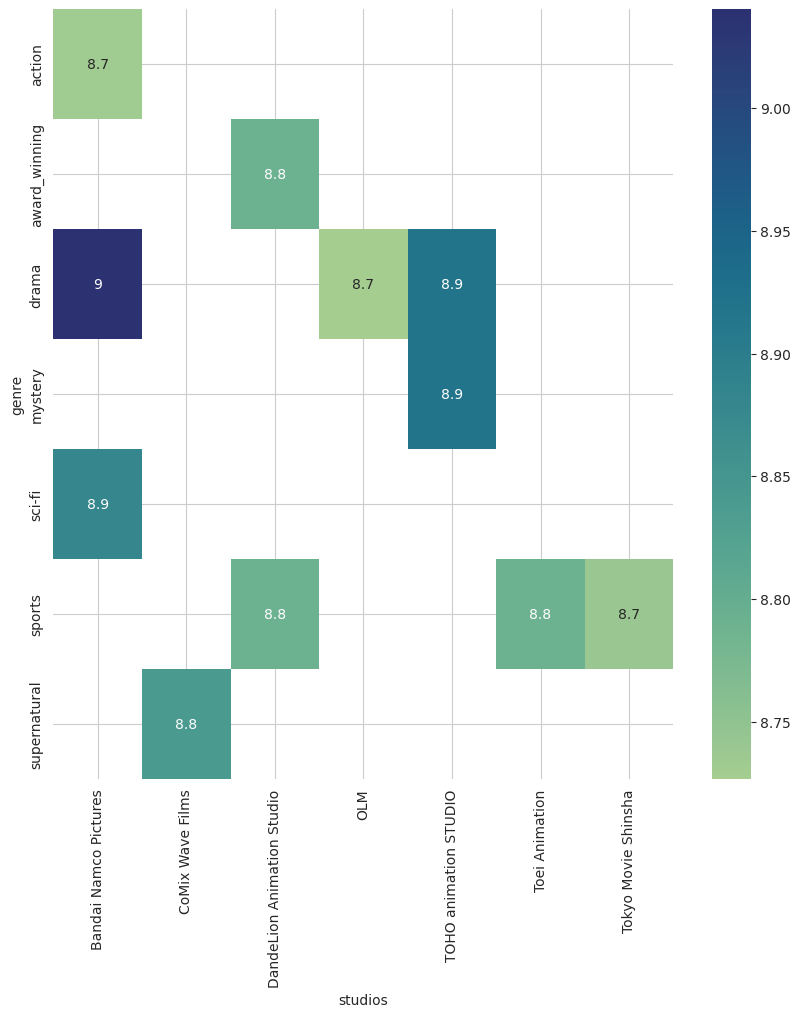

In [123]:
exploded_studios_genres_grouped_10 = exploded_studios_genres_grouped[exploded_studios_genres_grouped["score"]>8.7].sort_values("score", ascending=False)
exploded_studios_genres_grouped_10

plt.figure(figsize = (10,10))
sns.heatmap(
    exploded_studios_genres_grouped_10
    .pivot(index="genre",columns="studios",values="score"),
    cmap="crest",
    annot=True)
plt.show()

# SQL

 ## Q1

 ## Q2

 ## Q3

 ## Q4

 ## Q5

 ## Q6

 ## Q7

 ## Q8

 ## Q9

 ## Q10